<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/OB_2%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Project Overview

**월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회**

Source : https://dacon.io/competitions/official/235713/overview/description


변수 설명 : https://dacon.io/competitions/official/235713/talkboard/402821


다중분류문제 <br>
평가 방식 : *logloss*

###import library

In [ ]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###import dataset

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv')

In [ ]:
# train data
print('train info\n')
train.info()

train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

In [ ]:
print('train data\n')
train.head(3)

train data



,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


In [ ]:
# 타켓 변수 확인
train.credit.unique()

array([1., 2., 0.])

In [ ]:
# test data
print('test info\n')
test.info(3)

test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 

In [ ]:
print('test data\n')
test.head(3)

test data



,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


#1. Preprocessing

In [ ]:
train_cleaned = train.copy()
test_cleaned = test.copy()

##Step 1. EDA: 어떤 변수에 처리가 필요한가?

**findings**
1. FLAG_MOBIL: 모든 행의 값이 1, drop 필요

2. child_num: 14가 3개, 19가 1개 있음, 데이터 이상으로 판단하여 이상치 처리 필요

3. occyp_type: level이 많아서 다루는 방법을 고민해야 함+결측치 다수 존재

4. 전처리 딱히 필요 없어보이는 칼럼:
car, reality, income_type, edu_type, family_type, house_type, work_phone, phone, email

5. 전처리 필요해보이는 칼럼 (주로 연속형 변수):
income_total, DAYS_BIRTH, DAYS_EMPLOYED, family_size(근데 연속형 변수 아니고 걍 정수로 다뤄도 될듯), begin_month, child_num, occyp_type


In [ ]:
train['car'].value_counts()

,count
car,
N,16410
Y,10047


In [ ]:
pd.crosstab(train['car'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
car,,,
N,0.12078,0.243144,0.636076
Y,0.12342,0.226635,0.649945


In [ ]:
train['reality'].value_counts()

,count
reality,
Y,17830
N,8627


In [ ]:
pd.crosstab(train['reality'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
reality,,,
N,0.123334,0.224296,0.652370
Y,0.121032,0.242961,0.636007


In [ ]:
train['child_num'].value_counts()

,count
child_num,
0,18340
1,5386
2,2362
3,306
4,47
5,10
14,3
7,2
19,1


In [ ]:
train['income_type'].value_counts()

,count
income_type,
Working,13645
Commercial associate,6202
Pensioner,4449
State servant,2154
Student,7


In [ ]:
pd.crosstab(train['income_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
income_type,,,
Commercial associate,0.126088,0.216704,0.657207
Pensioner,0.120477,0.243650,0.635873
State servant,0.123027,0.227019,0.649954
Student,0.000000,0.428571,0.571429
Working,0.120117,0.245291,0.634591


In [ ]:
train['edu_type'].value_counts()

,count
edu_type,
Secondary / secondary special,17995
Higher education,7162
Incomplete higher,1020
Lower secondary,257
Academic degree,23


In [ ]:
pd.crosstab(train['edu_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
edu_type,,,
Academic degree,0.086957,0.304348,0.608696
Higher education,0.126920,0.244485,0.628595
Incomplete higher,0.111765,0.241176,0.647059
Lower secondary,0.108949,0.229572,0.661479
Secondary / secondary special,0.120533,0.233620,0.645846


In [ ]:
train['family_type'].value_counts()

,count
family_type,
Married,18196
Single / not married,3496
Civil marriage,2123
Separated,1539
Widow,1103


In [ ]:
pd.crosstab(train['family_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
family_type,,,
Civil marriage,0.135657,0.253886,0.610457
Married,0.121620,0.227523,0.650857
Separated,0.125406,0.226771,0.647823
Single / not married,0.114989,0.268879,0.616133
Widow,0.114234,0.271079,0.614687


In [ ]:
train['house_type'].value_counts()

,count
house_type,
House / apartment,23653
With parents,1257
Municipal apartment,818
Rented apartment,429
Office apartment,190
Co-op apartment,110


In [ ]:
pd.crosstab(train['house_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
house_type,,,
Co-op apartment,0.127273,0.272727,0.600000
House / apartment,0.121465,0.235446,0.643090
Municipal apartment,0.134474,0.195599,0.669927
Office apartment,0.126316,0.252632,0.621053
Rented apartment,0.116550,0.342657,0.540793
With parents,0.120127,0.249006,0.630867


In [ ]:
train['FLAG_MOBIL'].value_counts()

,count
FLAG_MOBIL,
1,26457


In [ ]:
train['work_phone'].value_counts()

,count
work_phone,
0,20511
1,5946


In [ ]:
pd.crosstab(train['work_phone'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
work_phone,,,
0,0.121545,0.236166,0.642290
1,0.122603,0.239321,0.638076


In [ ]:
train['phone'].value_counts()

,count
phone,
0,18672
1,7785


In [ ]:
pd.crosstab(train['phone'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
phone,,,
0,0.120234,0.241538,0.638228
1,0.125498,0.225690,0.648812


In [ ]:
train['email'].value_counts()

,count
email,
0,24042
1,2415


In [ ]:
pd.crosstab(train['email'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
email,,,
0,0.122827,0.238083,0.639090
1,0.111387,0.224845,0.663768


In [ ]:
train['occyp_type'].value_counts()

,count
occyp_type,
Laborers,4512
Core staff,2646
Sales staff,2539
Managers,2167
Drivers,1575
High skill tech staff,1040
Accountants,902
Medicine staff,864
Cooking staff,457


In [ ]:
pd.crosstab(train['occyp_type'], train['credit'], normalize='index')

credit,0.0,1.0,2.0
occyp_type,,,
Accountants,0.130820,0.251663,0.617517
Cleaning staff,0.099256,0.230769,0.669975
Cooking staff,0.126915,0.240700,0.632385
Core staff,0.131141,0.235072,0.633787
Drivers,0.118730,0.227302,0.653968
HR staff,0.112903,0.064516,0.822581
High skill tech staff,0.118269,0.259615,0.622115
IT staff,0.195122,0.243902,0.560976
Laborers,0.129876,0.239805,0.630319


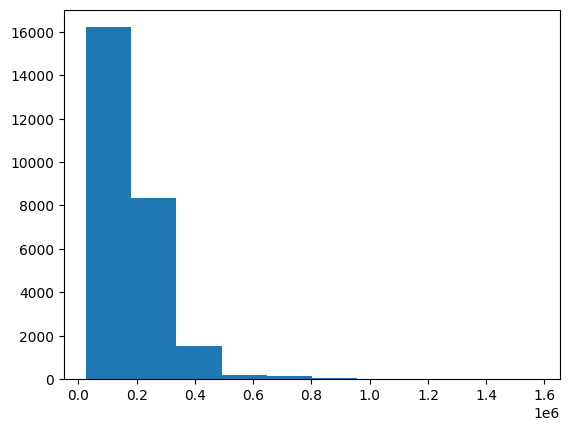

In [ ]:
plt.hist(train['income_total'])
plt.show()

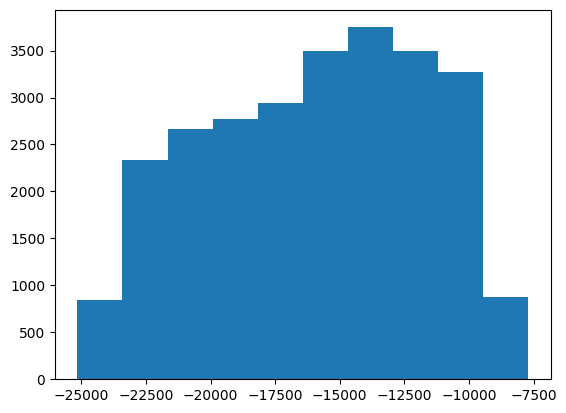

In [ ]:
plt.hist(train['DAYS_BIRTH'])
plt.show()

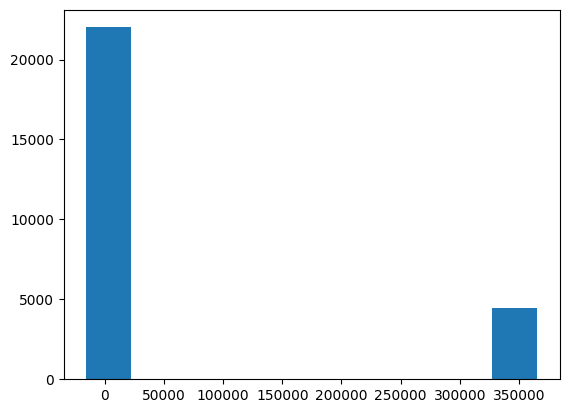

In [ ]:
plt.hist(train['DAYS_EMPLOYED'])
plt.show()

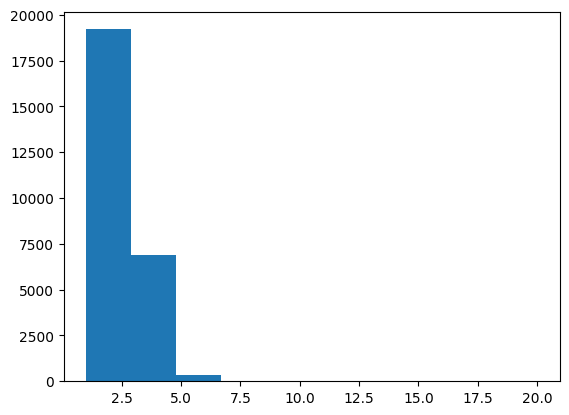

In [ ]:
plt.hist(train['family_size'])
plt.show()

In [ ]:
train['family_size'].value_counts()

,count
family_size,
2.0,14106
1.0,5109
3.0,4632
4.0,2260
5.0,291
6.0,44
7.0,9
15.0,3
9.0,2


In [ ]:
train['gender'].value_counts()

,count
gender,
F,17697
M,8760


In [ ]:
train['credit'].value_counts()

,count
credit,
2.0,16968
1.0,6267
0.0,3222


In [ ]:
train['credit'].value_counts(normalize=True)

,proportion
credit,
2.0,0.641343
1.0,0.236875
0.0,0.121783


##Step 2. 전처리 & 변수 별 EDA

### index, FLAG_MOBIL

In [ ]:
train_cleaned.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)
test_cleaned.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)

###begin_month

In [ ]:
#결측치 없음

train['begin_month'].isnull().sum()

np.int64(0)

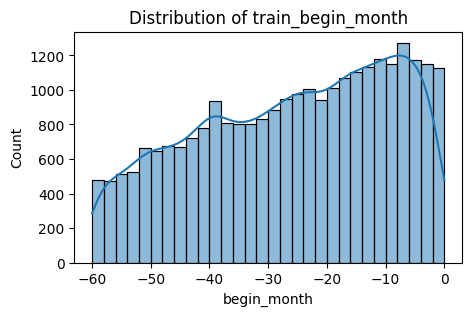

In [ ]:
#분포 확인

plt.figure(figsize = (5, 3))
sns.histplot(train['begin_month'], bins = 30, kde = True)

plt.title('Distribution of train_begin_month')
plt.show()

#가입자가 점점 늘었군... 마케팅성과가 좋은가? 굿~ 화이팅

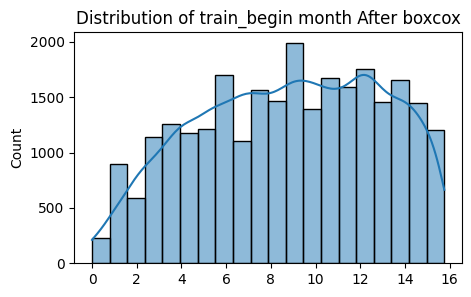

In [ ]:
from scipy import stats

train_begin_month_boxcox = train['begin_month'].copy()
train_begin_month_boxcox = -1 * train_begin_month_boxcox +1

train_begin_month_boxcox, lambda_value = stats.boxcox(train_begin_month_boxcox)

plt.figure(figsize=(5, 3))
sns.histplot(train_begin_month_boxcox, bins = 20, kde = True)

plt.title('Distribution of train_begin month After boxcox')
plt.show()

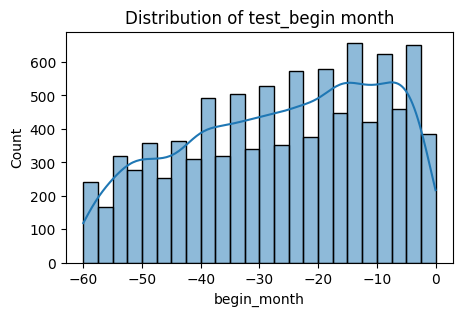

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(test['begin_month'], kde = True)

plt.title('Distribution of test_begin month')
plt.show()

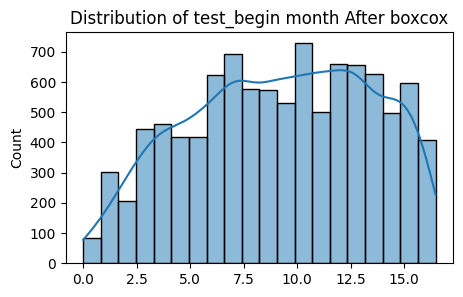

In [ ]:
test_begin_month_boxcox = test['begin_month'].copy()
test_begin_month_boxcox = -1 * test_begin_month_boxcox +1

test_begin_month_boxcox, lambda_value = stats.boxcox(test_begin_month_boxcox)

plt.figure(figsize=(5, 3))
sns.histplot(test_begin_month_boxcox, bins = 20, kde = True)

plt.title('Distribution of test_begin month After boxcox')
plt.show()

In [ ]:
#왜도가 나아지기는 했는데, 처리 전에도 왜곡이 심하지 않아서 그대로 둬도 됐을지?

print('train', '\n처리 전: ', train['begin_month'].skew(), ' 처리 후: ', stats.skew(train_begin_month_boxcox))
print('test', '\n처리 전: ', test['begin_month'].skew(), ' 처리 후: ', stats.skew(test_begin_month_boxcox))

train 
처리 전:  -0.2900502776044837  처리 후:  -0.16584206250930958
test 
처리 전:  -0.2768755438431637  처리 후:  -0.16472633105498882


In [ ]:
#왜곡 처리 하는게 맞다고 팀원들이 동의하면 아래 코드 실행
#왜곡 처리 안하기로 함

#train_cleaned['begin_month'] = train_begin_month_boxcox
#test_cleaned['begin_month] = test_begin_month_boxkox

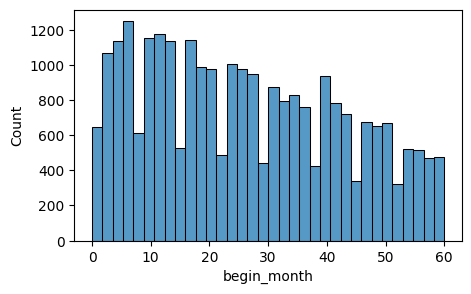

In [ ]:
#원본 데이터 그대로, -1 곱해서 양수로만 바꿔줌

train_cleaned['begin_month'] = -1 * train['begin_month']

plt.figure(figsize= (5, 3))
sns.histplot(train_cleaned['begin_month'])
plt.show()

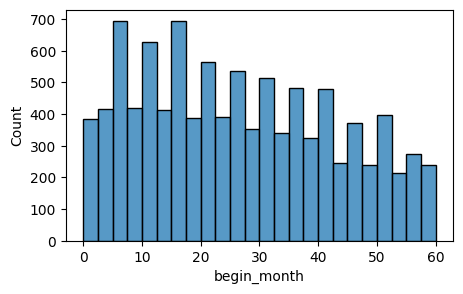

In [ ]:
test_cleaned['begin_month'] = -1 * test['begin_month']

plt.figure(figsize= (5, 3))
sns.histplot(test_cleaned['begin_month'])
plt.show()

###DAYS_BIRTH, DAYS_EMPLOYED

In [ ]:
# 결측치 확인

MD_DB = train['DAYS_BIRTH'].isnull().sum()
MD_DE = train['DAYS_EMPLOYED'].isnull().sum()

print('DAY_BIRTH의 결측치 개수', MD_DB, '개,  ', 'DAY_EMPLOYED의 결측치 개수' , MD_DE,'개')

DAY_BIRTH의 결측치 개수 0 개,   DAY_EMPLOYED의 결측치 개수 0 개


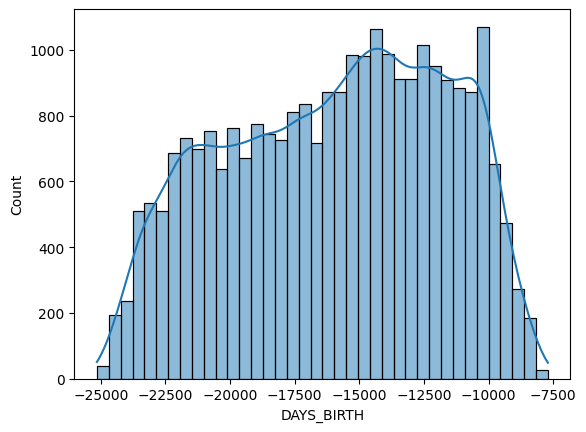

In [ ]:
sns.histplot(train['DAYS_BIRTH'], kde=True)
plt.show()

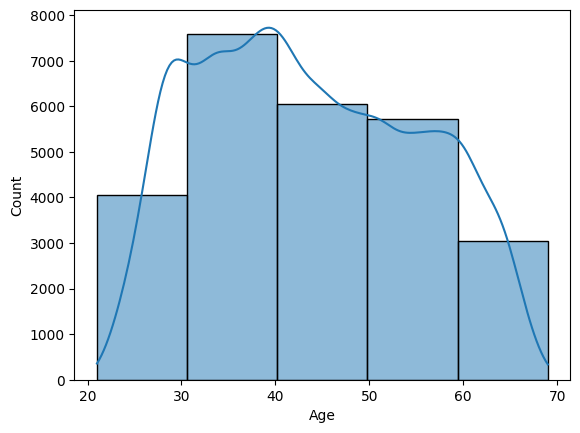

In [ ]:
train_cp = train.copy()

train_cp['Age'] = round(abs(train_cp['DAYS_BIRTH'])/365.5,0) #윤년 고려해서 /365가 아니라 /365.5를 해야한다는 그런 GPT와 코드 공유를 확인.

sns.histplot(train_cp['Age'], kde=True, bins=5)
plt.show()

#결과적으로 보면 30, 40, 50대가 가장 많음

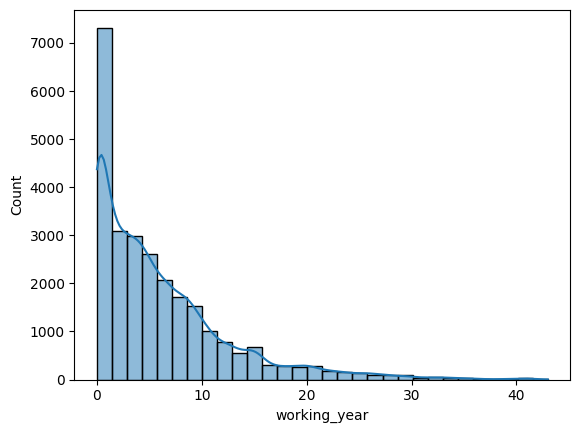

In [ ]:
# n년으로 환산한거


train_cp['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 2) for s in train_cp['DAYS_EMPLOYED']]
sns.histplot(train_cp['working_year'], bins=30, kde=True)
plt.show()

# 무직이 많다. 근속년수가 40넘어가는게 신기해서 찾아보니까 60대 분들이셨다.

In [ ]:
from scipy.stats import skew

print('나이의 왜도', skew(train['DAYS_BIRTH']))
print('근속년수의 왜도', skew(train['DAYS_EMPLOYED']))

나이의 왜도 -0.18597573318910493
근속년수의 왜도 1.7774952176044165


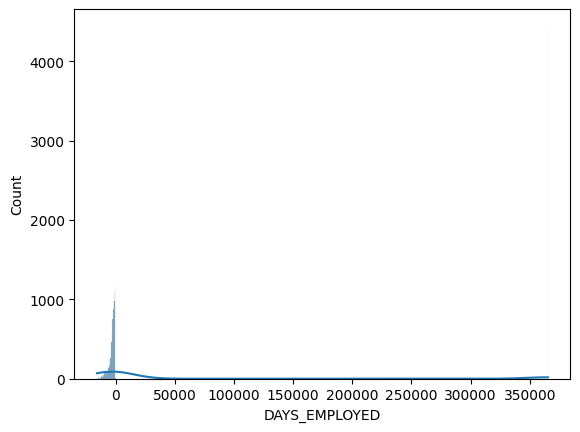

In [ ]:
sns.histplot(train_cp['DAYS_EMPLOYED'],kde=True)
plt.show()

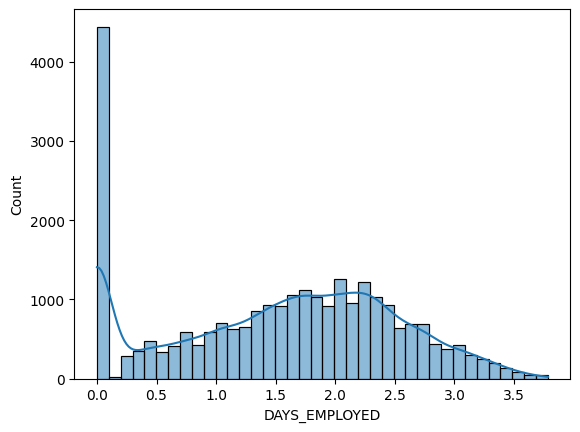

In [ ]:
# 로그 변환 시
train_cp['DAYS_EMPLOYED'] = [0 if s >=0 else round(abs(s)/365.5, 2) for s in train_cp['DAYS_EMPLOYED']]
sns.histplot(np.log1p(train_cp['DAYS_EMPLOYED']),kde=True)
plt.show()

####데이터 변환 및 파생 변수 생성

In [ ]:
#근속년수 변수 추가
train_cleaned['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 0) for s in train_cleaned['DAYS_EMPLOYED']]

# 다른 전처리 참고하여 해당 칼럼은 양수면 0, 음수면 양수로 변환
train_cleaned['DAYS_EMPLOYED'] = train_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
train_cleaned['DAYS_EMPLOYED'] = -1 * train_cleaned['DAYS_EMPLOYED']

# DAYS_BIRTH 양수 변환
train_cleaned['DAYS_BIRTH'] = -1 * train_cleaned['DAYS_BIRTH']

# 나이 변수 추가
train_cleaned['AGE'] = round(abs(train_cleaned['DAYS_BIRTH'])/365.5,0)

In [ ]:
#test set

# 근속년수 변수 추가
test_cleaned['working_year'] = [0 if s >=0 else round(abs(s)/365.5, 0) for s in test_cleaned['DAYS_EMPLOYED']]

# DAYS_EMPLOYED 정리하기(양수는 0으로, 음수는 양수로)
test_cleaned['DAYS_EMPLOYED'] = test_cleaned['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test_cleaned['DAYS_EMPLOYED'] = -1 * test_cleaned['DAYS_EMPLOYED']

# DAYS_BIRTH 정리하기 (전부 양수로)
test_cleaned['DAYS_BIRTH'] = -1 * test_cleaned['DAYS_BIRTH']

# 나이 변수 추가
test_cleaned['AGE'] = round(abs(test_cleaned['DAYS_BIRTH'])/365.5,0)



---



###occyp_type

In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

8171


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

3152


In [ ]:
print(train_cleaned.groupby('income_type')['occyp_type'].apply(lambda x: x.isna().sum()))
print(train_cleaned.groupby('edu_type')['occyp_type'].apply(lambda x: x.isna().sum()))

income_type
Commercial associate    1026
Pensioner               4440
State servant            392
Student                    1
Working                 2312
Name: occyp_type, dtype: int64
edu_type
Academic degree                    13
Higher education                 1974
Incomplete higher                 300
Lower secondary                   124
Secondary / secondary special    5760
Name: occyp_type, dtype: int64


1. income_type별 결측치 개수
- **Pensioner(연금 수령자)** 그룹에서 가장 많은 결측치 (4440개) → 은퇴자라서 직업이 없을 가능성이 큼.
- **Commercial associate, Working** 그룹도 결측치가 많음 → 특정 직군에서 데이터가 누락된 이유가 있을 수 있음.

2. edu_type별 결측치 개수
- **중등 교육(Secondary) 이상**에서 대부분의 결측치가 발생 → 직업 유형 결측치와 교육 수준 간의 직접적인 상관관계는 낮아 보임.

In [ ]:
print(train_cleaned[train_cleaned['income_type'] == 'Pensioner']['DAYS_EMPLOYED'].describe())

count    4449.000000
mean        4.196673
std       116.122881
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5521.000000
Name: DAYS_EMPLOYED, dtype: float64


- 평균이 364,335일 (~997년)
- 25%, 50%, 75% 모두 365,243일 (정확히 1000년) → 비정상인 값, DAYS_EMPLOYED = 365243이 결측치 처리 방식일 가능성
- DAYS_EMPLOYED = 365243 → 더 이상 고용되지 않은 상태(실업/퇴직자) =  **"Retired"**로 대체

In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Pensioner') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Pensioner') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
# Student, State Servant → occyp_type을 'Student', 'State Servant'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Student') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Student'
train_cleaned.loc[(train_cleaned['income_type'] == 'State servant') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'State servant'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Student') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Student'
test_cleaned.loc[(test_cleaned['income_type'] == 'State servant') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'State servant'

In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

3338


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

1297


In [ ]:
print(train_cleaned[train_cleaned['occyp_type'].isna()]['house_type'].value_counts())
print(train_cleaned[train_cleaned['occyp_type'].isna()]['family_type'].value_counts())

house_type
House / apartment      2939
With parents            223
Municipal apartment      89
Rented apartment         70
Office apartment         14
Co-op apartment           3
Name: count, dtype: int64
family_type
Married                 2368
Single / not married     443
Civil marriage           271
Separated                186
Widow                     70
Name: count, dtype: int64


3. house_type별 결측치 개수
- House / apartment(3281), **With parents(239)**에서 결측치가 많음.
→ 가족과 함께 거주하는 경우, 무직일 가능성이 더 높을 수 있음
4. family_type별 결측치 개수
- **Married(2650)**에서 가장 많은 결측치 → 기혼자는 육아나 가사로 인해 경제활동을 하지 않는 경우가 많을 수 있음

In [ ]:
# Married(기혼) + 여성 → 'Housewife'로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Married') & (train_cleaned['gender'] == 'F') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

In [ ]:
test_cleaned.loc[(test_cleaned['family_type'] == 'Married') & (test_cleaned['gender'] == 'F') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Housewife'

- 기혼 여성은 육아나 가사로 인해 경제활동을 하지 않을 확률이 높음.
- 따라서 여성이고 기혼(Married)인데 occyp_type이 결측이면 → 'Housewife'로 대체

In [ ]:
# With parents(부모와 동거) → Unemployed로 대체
train_cleaned.loc[(train_cleaned['house_type'] == 'With parents') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
test_cleaned.loc[(test_cleaned['house_type'] == 'With parents') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Unemployed'

In [ ]:
# 미혼(Single) + 고등 교육(Higher education 이상) → 사회초년생(Entry-level)로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Single / not married') &
          (train_cleaned['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
test_cleaned.loc[(test_cleaned['family_type'] == 'Single / not married') &
          (test_cleaned['edu_type'].isin(['Higher education', 'Incomplete higher'])) &
          (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Entry-level'

In [ ]:
# income_type별 최빈값 및 총 개수 출력
income_total_counts = train_cleaned["income_type"].value_counts()
income_mode = train_cleaned.groupby("income_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
income_mode_counts = train_cleaned.groupby("income_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

income_df = pd.DataFrame({
    "Total Count": income_total_counts,
    "Most Frequent occyp_type": income_mode,
    "Count of Most Frequent occyp_type": income_mode_counts
})
print("🔹 income_type별 최빈값 개수:")
print(income_df)

# edu_type별 최빈값 및 총 개수 출력
edu_total_counts = train_cleaned["edu_type"].value_counts()
edu_mode = train_cleaned.groupby("edu_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
edu_mode_counts = train_cleaned.groupby("edu_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

edu_df = pd.DataFrame({
    "Total Count": edu_total_counts,
    "Most Frequent occyp_type": edu_mode,
    "Count of Most Frequent occyp_type": edu_mode_counts
})
print("\n🔹 edu_type별 최빈값 개수:")
print(edu_df)

# family_type별 최빈값 및 총 개수 출력
family_total_counts = train_cleaned["family_type"].value_counts()
family_mode = train_cleaned.groupby("family_type")["occyp_type"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
family_mode_counts = train_cleaned.groupby("family_type")["occyp_type"].apply(lambda x: (x == x.mode()[0]).sum())

family_df = pd.DataFrame({
    "Total Count": family_total_counts,
    "Most Frequent occyp_type": family_mode,
    "Count of Most Frequent occyp_type": family_mode_counts
})
print("\n🔹 family_type별 최빈값 개수:")
print(family_df)

🔹 income_type별 최빈값 개수:
                      Total Count Most Frequent occyp_type  \
income_type                                                  
Commercial associate         6202                 Laborers   
Pensioner                    4449                  Retired   
State servant                2154               Core staff   
Student                         7               Core staff   
Working                     13645                 Laborers   

                      Count of Most Frequent occyp_type  
income_type                                              
Commercial associate                               1075  
Pensioner                                          4440  
State servant                                       655  
Student                                               4  
Working                                            3290  

🔹 edu_type별 최빈값 개수:
                               Total Count Most Frequent occyp_type  \
edu_type                                    







[최빈값이 과반수 이상을 차지하는 경우]

1. income_type

| type                  | total | frequent        | value |
|-----------------------|-------|----------------|-------|
| Pensioner  | 4449  | Retired       | 4440  |
| Student            | 7  | Core staff        | 4  |

2. edu_type

- X

3. family_type

| type                  | total | frequent        | value |
|-----------------------|-------|----------------|-------|
| Widow  | 1103  | Retired       | 605  |


In [ ]:
# Pensioner 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Pensioner') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

# Student 그룹에서 occyp_type이 NaN인 경우 'Core staff'로 대체
train_cleaned.loc[(train_cleaned['income_type'] == 'Student') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Core staff'

# Widow 그룹에서 occyp_type이 NaN인 경우 'Retired'로 대체
train_cleaned.loc[(train_cleaned['family_type'] == 'Widow') & (train_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
test_cleaned.loc[(test_cleaned['income_type'] == 'Pensioner') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'
test_cleaned.loc[(test_cleaned['income_type'] == 'Student') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Core staff'
test_cleaned.loc[(test_cleaned['family_type'] == 'Widow') & (test_cleaned['occyp_type'].isna()), 'occyp_type'] = 'Retired'

In [ ]:
print(train_cleaned['occyp_type'].isna().sum())

1379


In [ ]:
print(test_cleaned['occyp_type'].isna().sum())

552


<남은 결측치 개수>
- train: 1379
- test: 552

####**남은 결측치 처리: unknown (train_clenaed_unknown)**

In [ ]:
train_cleaned_unknown = train_cleaned.copy()
test_cleaned_unknown = test_cleaned.copy()

In [ ]:
# 남은 결측치 'Unknown'으로 변환
train_cleaned_unknown['occyp_type'].fillna('Unknown', inplace=True)

In [ ]:
# 남은 결측치 'Unknown'으로 변환
test_cleaned_unknown['occyp_type'].fillna('Unknown', inplace=True)

####**남은 결측치 처리: KNN (train_cleaned_knn)**

In [ ]:
train_cleaned_knn_prep = train_cleaned.copy()
test_cleaned_knn_prep = test_cleaned.copy()

train_cleaned_knn = train_cleaned.copy()
test_cleaned_knn = test_cleaned.copy()

##### 명목형 변수 처리 for KNN

- gender, car, reality는 0, 1로 코딩
- income_type, edu_type, family_type, house_type, occyp_type은 level이 5개 이상이므로 일괄적으로 원핫 인코딩 또는 더미변수로 처리할 경우 차원의 저주 문제를 유발할 수 있음.


-> 명목형 변수 처리 논의 필요

In [ ]:
train_cleaned_knn_prep.dtypes

,0
gender,object
car,object
reality,object
child_num,int64
income_total,float64
income_type,object
edu_type,object
family_type,object
house_type,object
DAYS_BIRTH,int64


In [ ]:
#gender, car, reality 처리

train_cleaned_knn_prep['gender'] = train_cleaned_knn_prep['gender'].replace({'F': 0, 'M': 1})
train_cleaned_knn_prep['car'] = train_cleaned_knn_prep['car'].replace({'N': 0, 'Y': 1})
train_cleaned_knn_prep['reality'] = train_cleaned_knn_prep['reality'].replace({'N': 0, 'Y': 1})

test_cleaned_knn_prep['gender'] = test_cleaned_knn_prep['gender'].replace({'F': 0, 'M': 1})
test_cleaned_knn_prep['car'] = test_cleaned_knn_prep['car'].replace({'N': 0, 'Y': 1})
test_cleaned_knn_prep['reality'] = test_cleaned_knn_prep['reality'].replace({'N': 0, 'Y': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Ordinal Encoding (순서형 변수)
edu_type_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

family_type_map = {
    'Widow': 0,
    'Single / not married': 1,
    'Separated': 2,
    'Civil marriage': 3,
    'Married': 4
}

train_cleaned_knn_prep['edu_type'] = train_cleaned_knn_prep['edu_type'].map(edu_type_map)
test_cleaned_knn_prep['edu_type'] = test_cleaned_knn_prep['edu_type'].map(edu_type_map)

train_cleaned_knn_prep['family_type'] = train_cleaned_knn_prep['family_type'].map(family_type_map)
test_cleaned_knn_prep['family_type'] = test_cleaned_knn_prep['family_type'].map(family_type_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# occyp_type 결측치를 '-1'로 임시 대체 (결측치 유지)
train_cleaned_knn_prep['occyp_type'] = train_cleaned_knn_prep['occyp_type'].fillna('-1')
test_cleaned_knn_prep['occyp_type'] = test_cleaned_knn_prep['occyp_type'].fillna('-1')

# 2️⃣ Nominal Encoding (명목형 변수)
categorical_cols = ['income_type', 'house_type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_cleaned_knn_prep[col])  # train 데이터 기준 학습
    train_cleaned_knn_prep[col] = le.transform(train_cleaned_knn_prep[col])  # 변환
    test_cleaned_knn_prep[col] = le.transform(test_cleaned_knn_prep[col])  # 변환
    label_encoders[col] = le  # 변환 기준 저장 (디코딩 용도)

# occyp_type Label Encoding (복구 가능하도록)
le_occyp = LabelEncoder()
train_cleaned_knn_prep['occyp_type'] = le_occyp.fit_transform(train_cleaned_knn_prep['occyp_type'])
test_cleaned_knn_prep['occyp_type'] = le_occyp.transform(test_cleaned_knn_prep['occyp_type'])

# 변환 기준 저장
label_encoders['occyp_type'] = le_occyp

# '-1'을 다시 NaN으로 복원 (KNN을 위해)
train_cleaned_knn_prep.loc[train_cleaned_knn_prep['occyp_type'] == le_occyp.transform(['-1'])[0], 'occyp_type'] = np.nan
test_cleaned_knn_prep.loc[test_cleaned_knn_prep['occyp_type'] == le_occyp.transform(['-1'])[0], 'occyp_type'] = np.nan

# 변환된 값 확인
for col, le in label_encoders.items():
    print(f"🔹 {col} 변환 기준:", dict(zip(le.classes_, le.transform(le.classes_))))

# 변환 후 결측치 개수 확인
print("변환 후, train에서 occyp_type 결측치 개수:", train_cleaned_knn_prep['occyp_type'].isna().sum())
print("변환 후, test에서 occyp_type 결측치 개수:", test_cleaned_knn_prep['occyp_type'].isna().sum())

🔹 income_type 변환 기준: {'Commercial associate': np.int64(0), 'Pensioner': np.int64(1), 'State servant': np.int64(2), 'Student': np.int64(3), 'Working': np.int64(4)}
🔹 house_type 변환 기준: {'Co-op apartment': np.int64(0), 'House / apartment': np.int64(1), 'Municipal apartment': np.int64(2), 'Office apartment': np.int64(3), 'Rented apartment': np.int64(4), 'With parents': np.int64(5)}
🔹 occyp_type 변환 기준: {'-1': np.int64(0), 'Accountants': np.int64(1), 'Cleaning staff': np.int64(2), 'Cooking staff': np.int64(3), 'Core staff': np.int64(4), 'Drivers': np.int64(5), 'Entry-level': np.int64(6), 'HR staff': np.int64(7), 'High skill tech staff': np.int64(8), 'Housewife': np.int64(9), 'IT staff': np.int64(10), 'Laborers': np.int64(11), 'Low-skill Laborers': np.int64(12), 'Managers': np.int64(13), 'Medicine staff': np.int64(14), 'Private service staff': np.int64(15), 'Realty agents': np.int64(16), 'Retired': np.int64(17), 'Sales staff': np.int64(18), 'Secretaries': np.int64(19), 'Security staff': np.in

#####스케일링 for KNN

- **KNN은 거리 기반 알고리즘** => 모든 변수의 스케일을 동일하게 맞춰야 함
- Min-Max Scaling(0~1 정규화)로 모든 값을 일정한 범위로 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링할 모든 수치형 변수
scale_cols = ["begin_month", "income_total", "DAYS_EMPLOYED", "DAYS_BIRTH",
              "family_size", "child_num", "work_phone", "phone", "email"]

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# train과 test에 동일한 스케일 적용
train_cleaned_knn_prep[scale_cols] = scaler.fit_transform(train_cleaned_knn_prep[scale_cols])
test_cleaned_knn_prep[scale_cols] = scaler.transform(test_cleaned_knn_prep[scale_cols])

#####KNN imputation

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

# Train과 Test에서 공통된 Feature만 선택
# 일부 train과 test 데이터의 feature 이름이 다름
common_columns = list(set(train_cleaned_knn_prep.columns) & set(test_cleaned_knn_prep.columns))

# KNN Imputer 설정 (k=5)
knn_imputer = KNNImputer(n_neighbors=5)

# Train에서 fit한 KNN을 test에도 동일하게 transform (공통 컬럼만 사용)
train_knn_imputed = knn_imputer.fit_transform(train_cleaned_knn_prep[common_columns])
test_knn_imputed = knn_imputer.transform(test_cleaned_knn_prep[common_columns])

# 다시 데이터프레임으로 변환 (공통된 컬럼만 업데이트)
train_cleaned_knn_prep.loc[:, common_columns] = train_knn_imputed
test_cleaned_knn_prep.loc[:, common_columns] = test_knn_imputed

# KNN으로 채운 occyp_type을 다시 정수로 변환
train_cleaned_knn['occyp_type'] = train_cleaned_knn_prep['occyp_type'].round().astype(int)
test_cleaned_knn['occyp_type'] = test_cleaned_knn_prep['occyp_type'].round().astype(int)

In [ ]:
print(train_cleaned_knn['occyp_type'].isna().sum())  # 남은 결측치 개수 확인

0


In [ ]:
# KNN 적용 후에도 결측치가 아닌 행들의 값이 의미 없이 0으로 채워졌는지 확인
print(train_cleaned.loc[train_cleaned['occyp_type'].isna(), 'occyp_type'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
# KNN으로 채운 occyp_type을 원래 문자형(Label Decoding)으로 복원
train_cleaned_knn['occyp_type'] = le_occyp.inverse_transform(train_cleaned_knn['occyp_type'].fillna(-1).astype(int))
test_cleaned_knn['occyp_type'] = le_occyp.inverse_transform(test_cleaned_knn['occyp_type'].fillna(-1).astype(int))

In [ ]:
print(train_cleaned['occyp_type'].value_counts())
print(test_cleaned['occyp_type'].value_counts())

occyp_type
Laborers                 4512
Retired                  4510
Core staff               2646
Sales staff              2539
Managers                 2167
Housewife                1576
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
State servant             392
Private service staff     243
Entry-level               169
Unemployed                144
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Student                     1
Name: count, dtype: int64
occyp_type
Retired                  1724
Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Housewife                 577
Drivers                   563
Medicine staff        

###income_total

income_total : 연간 소득

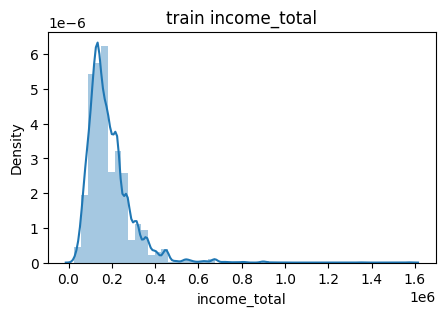

In [ ]:
# train income_total 분포 시각화
plt.figure(figsize = (5, 3))
sns.distplot(train['income_total'])
plt.title('train income_total')
plt.show()

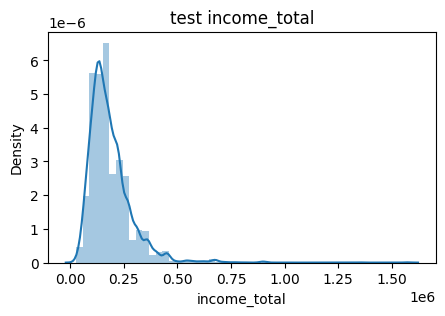

In [ ]:
# test income_total 분포 시각화
plt.figure(figsize = (5, 3))
sns.distplot(test['income_total'])
plt.title('test income_total')
plt.show()

그래프 시각화에 따르면, right skewed

In [ ]:
# 왜도 계산
print(train['income_total'].skew(), test['income_total'].skew())

2.659270736824145 2.9536726999395118


1.5보다 크기 때문에 왜곡이 심한 것을 알 수 있음

In [ ]:
train_income_total_log = np.log1p(train['income_total'])
test_income_total_log = np.log1p(test['income_total'])

In [ ]:
print(train_income_total_log.skew(), test_income_total_log.skew())

0.09233294925344264 0.10309615296904602


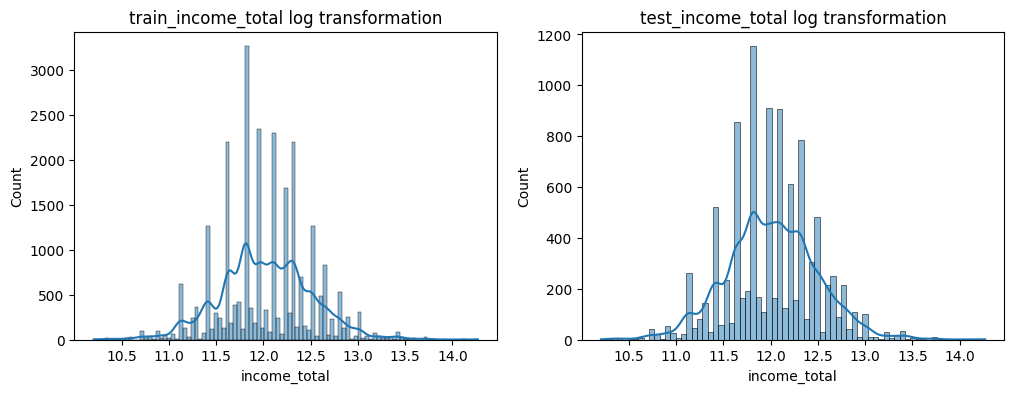

In [ ]:
fig, ax = plt.subplots(figsize = (12,4), nrows = 1, ncols = 2)
sns.histplot(train_income_total_log, kde=True, ax=ax[0])
sns.histplot(test_income_total_log, kde=True, ax=ax[1])
ax[0].set_title('train_income_total log transformation')
ax[1].set_title('test_income_total log transformation')
plt.show()

In [ ]:
for df in [train_cleaned_unknown, train_cleaned_knn]:
  df['income_total'] = train_income_total_log

for df in [test_cleaned_unknown, test_cleaned_knn]:
  df['income_total'] = test_income_total_log

###family_size, child_num

In [ ]:
# 결측치 없음
train['family_size'].isnull().sum()

np.int64(0)

In [ ]:
# 결측치 없음
train['child_num'].isnull().sum()

np.int64(0)

In [ ]:
train[train['family_size'] <= train['child_num']]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
5825,5825,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173,-678,1,0,1,1,Core staff,1.0,-16.0,2.0
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0
16110,16110,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12723,-1132,1,1,1,0,Sales staff,1.0,-48.0,2.0
16791,16791,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,-779,1,0,0,0,Core staff,1.0,-37.0,2.0
18879,18879,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755,-2105,1,0,0,0,NaN,1.0,-39.0,2.0
21096,21096,M,N,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16424,-1458,1,0,0,0,Drivers,1.0,-25.0,2.0


가족 규모보다 자식 수가 더 많은 것은 이상치라고 판단하여 확인해 본 결과 1개 밖에 없으므로 해당 데이터 삭제 처리하기로 결정

가족 규모 = 자식 수 = 1인 데이터가 5개 정도 발견되었는데 부모 없이 자녀만 있는 경우일수도 있음, 그러나 신용 카드를 쓸 수 있는 자녀 = 자식 없이 가족 수가 한 명인 데이터로 들어가도 될텐데 굳이 살펴봐야할 필요가 있는지 생각해봐야할 듯 > 삭제 처리 결정

In [ ]:
# 자식 없이 가족 수 한 명인 데이터가 있나 확인용 코드
train[(train['family_size'] == 1) & (train['child_num'] == 0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
10,10,F,N,Y,0,193500.0,Working,Secondary / secondary special,Separated,House / apartment,-19063,-2213,1,1,1,1,Laborers,1.0,-40.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
36,36,F,Y,N,0,225000.0,Working,Higher education,Single / not married,House / apartment,-20200,-1022,1,1,1,0,Accountants,1.0,-14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26436,26436,F,N,Y,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10924,-97,1,0,0,0,Cleaning staff,1.0,-22.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26450,26450,F,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10338,-581,1,0,1,0,Laborers,1.0,-37.0,2.0


In [ ]:
# 두가지 경우에 해당하는 데이터 삭제
for df in [train_cleaned_unknown, train_cleaned_knn]:
  df = df[df['family_size'] > df['child_num']]

In [ ]:
for df in [train_cleaned_unknown, train_cleaned_knn]:
  print(len(df))

26457
26457


In [ ]:
# 이혼 상태인데 (Seperated) & 부모 수('family_size'-'child_num')가 1이 아닌 경우
train[(train['family_type'].isin(['Seperated'])) & (train['family_size'] - train['child_num'] != 1)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
# 결혼 상태인데 (Married) & 부모 수('family_size'-'child_num')가 2가 아닌 경우
train[(train['family_type'].isin(['Married'])) & (train['family_size'] - train['child_num'] != 2)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0
16791,16791,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,-779,1,0,0,0,Core staff,1.0,-37.0,2.0
21096,21096,M,N,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16424,-1458,1,0,0,0,Drivers,1.0,-25.0,2.0


- 14900 : 자식 수가 가족 수보다 많아 이상치로 판단하여 제거
- 16791 & 21096 : 앞에서 문제 삼은 가족 수 = 자식 수 = 1인 경우 > 이미 제거함

In [ ]:
train['family_size'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  7., 15., 20.,  9.])

In [ ]:
train['child_num'].unique()

array([ 0,  1,  2,  3,  4,  5, 14, 19,  7])

In [ ]:
train[train['child_num'] >= 7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0
25638,25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-31.0,2.0


In [ ]:
train[train['family_size'] >= 9]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0
25638,25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-31.0,2.0


가족 수가 큰 데이터와 자녀 수가 큰 데이터가 동일함

↪ 자녀 수가 잘못 입력된 것이라고 판단

10731 : 결혼하지 않았는데 자식 수가 있는 것은 이상값이라 생각하여 자식 수를 0, 가족 수는 1로 변경

8462, 9021, 25390은 같은 사람인거 같은데 이상치라고 판단하여 모두 제거 결정

자녀 수가 7명인 것은 충분히 가능하다고 판단하여 그대로 진행

In [ ]:
# 10731
for df in [train_cleaned_unknown, train_cleaned_knn]:
  df.loc[df['child_num'] == 19, ['child_num', 'family_size']] = [0, 1]

# 8462, 9021, 25390
for df in [train_cleaned_unknown, train_cleaned_knn]:
  df = df.drop(df[df['child_num'] == 14].index)

In [ ]:
# 잘 변경되었는지 확인
train_cleaned_knn[train['family_size'] >= 9]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,working_year,AGE
8462,M,Y,Y,14,12.323860,Working,Secondary / secondary special,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,7.0,2.0,5.0,49.0
9021,M,Y,Y,14,12.323860,Working,Secondary / secondary special,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,58.0,2.0,5.0,49.0
10731,F,N,Y,0,11.630717,Working,Secondary / secondary special,Single / not married,House / apartment,11057,1853,1,1,0,Waiters/barmen staff,1.0,5.0,2.0,5.0,30.0
25313,F,N,N,7,11.967187,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,26.0,2.0,5.0,38.0
25390,M,Y,Y,14,12.323860,Working,Secondary / secondary special,Separated,House / apartment,17754,1689,0,0,0,Drivers,15.0,43.0,2.0,5.0,49.0
25638,F,N,N,7,11.967187,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,31.0,2.0,5.0,38.0


###최종 Step2 완료된 데이터셋

- **train_cleaned_unknown**: unknown으로 처리한 전처리 완료 데이터셋
- **train_cleaned_knn**: knn으로 처리한 전처리 완료 데이터셋

In [ ]:
train_cleaned_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
 18  workin

In [ ]:
train_cleaned_unknown.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,working_year,AGE
0,F,N,N,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,Housewife,2.0,6.0,1.0,13.0,38.0
1,F,N,Y,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,4.0,31.0
2,M,Y,Y,0,13.017005,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,12.0,52.0


In [ ]:
train_cleaned_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
 18  workin

In [ ]:
train_cleaned_knn.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,working_year,AGE
0,F,N,N,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,Housewife,2.0,6.0,1.0,13.0,38.0
1,F,N,Y,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,4.0,31.0
2,M,Y,Y,0,13.017005,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,12.0,52.0


##Step 3. 파생변수 추가

In [ ]:
for df in [train_cleaned_unknown, test_cleaned_unknown, train_cleaned_knn, test_cleaned_knn]:
#    before_EMPLOYED : 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['before_EMPLOYED'] = df['before_EMPLOYED'].apply(lambda x: max(x, 0)) ## 음수가 나올 수 있기 때문

#    DAYS_BIRTH 파생변수 - Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
    df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
    df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)


#    DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))
    df['working_year'] = df['DAYS_EMPLOYED'] // 365.5
    df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

#    ability : 소득 /(살아온 일수 + 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])

#    income_per_family : 소득 / 가족 수 ➡️ 가족원 1인당 소득
    df['income_per_family'] = df['income_total'] / df['family_size']

##Step 4. 중복 데이터 처리 (id, card_count 추가)

In [ ]:
# 모든 값이 중복된 데이터를 살펴보자

# 중복 되는 데이터 가져오기
dup_all = train[train.duplicated()]

print("모든 값이 중복되는 데이터 개수:", len(dup_all))

모든 값이 중복되는 데이터 개수: 0


In [ ]:
# 모든 값이 중복된 데이터를 살펴보자

# 중복 되는 데이터 가져오기
dup_all = test[test.duplicated()]

print("모든 값이 중복되는 데이터 개수:", len(dup_all))

모든 값이 중복되는 데이터 개수: 0


train 중복데이터를 제거하는게 모델 성능에 별로 좋지 않을 수 있음. test에서도 중복된 데이터가 있을 수 있는데 이에 대해 충분히 학습하지 못한다면 성능 저하.

똑같은 특성값들에 대해 같은 결과를 냈더니 언제는 신용등급이 0 되고 언제는 신용등급이 2가 되는데.. 트리가 잘 분기할 수 있도록 돕기 위한 방법을 생각해봐야 할 듯..

----------

###id 피처 생성

동일 인물임을 결정하는 조건 : `credit`, `begin_month` 제외 나머지 특성들이 같으면 동일 인물로 보기로 함.

In [ ]:
train_cleaned.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'working_year', 'AGE'],
      dtype='object')

In [ ]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size','AGE']

for df in [train_cleaned_unknown, test_cleaned_unknown, train_cleaned_knn, test_cleaned_knn]:
   df['id'] = df[cols].astype(str).agg('_'.join, axis=1)

In [ ]:
print(f"train_unknown set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(train_cleaned_unknown['id'].value_counts()>=2)}명")
print(f"test_unknown set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(test_cleaned_unknown['id'].value_counts()>=2)}명")

train_unknown set 동일인물의 중복데이터로 추정되는 사람의 수 : 5510명
test_unknown set 동일인물의 중복데이터로 추정되는 사람의 수 : 2462명


In [ ]:
print(f"train_knn set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(train_cleaned_knn['id'].value_counts()>=2)}명")
print(f"test_knn set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(test_cleaned_knn['id'].value_counts()>=2)}명")

train_knn set 동일인물의 중복데이터로 추정되는 사람의 수 : 5509명
test_knn set 동일인물의 중복데이터로 추정되는 사람의 수 : 2445명


In [ ]:
print(train_cleaned_unknown.shape,test_cleaned_unknown.shape)

(26457, 28) (10000, 27)


In [ ]:
print(train_cleaned_knn.shape,test_cleaned_knn.shape)

(26457, 28) (10000, 27)


In [ ]:
# train_unknown 데이터 개별 인물에게 부여된 id 확인
identity_counts_train = train_cleaned_unknown['id'].value_counts()
identity_counts_train.head(3)

,count
id,
F_N_Y_0_12.601490784782536_Commercial associate_Secondary / secondary special_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0_42.0,35
M_N_N_2_12.323860125621126_Working_Higher education_Civil marriage_House / apartment_16768_3088_1_0_0_Laborers_4.0_46.0,24
F_N_Y_1_11.967187086434018_State servant_Secondary / secondary special_Single / not married_House / apartment_12676_1350_0_0_0_Waiters/barmen staff_2.0_35.0,24


In [ ]:
# test_unknown 데이터 개별 인물에게 부여된 id 확인
identity_counts_test = test_cleaned_unknown['id'].value_counts()
identity_counts_test.head(3)

,count
id,
F_N_Y_0_12.601490784782536_Commercial associate_Secondary / secondary special_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0_42.0,16
F_N_Y_1_11.967187086434018_State servant_Secondary / secondary special_Single / not married_House / apartment_12676_1350_0_0_0_Waiters/barmen staff_2.0_35.0,11
F_N_Y_1_11.119897691565697_Working_Secondary / secondary special_Separated_House / apartment_11126_2087_1_1_0_Accountants_2.0_30.0,10


In [ ]:
# train_knn 데이터 개별 인물에게 부여된 id 확인
identity_counts_train = train_cleaned_knn['id'].value_counts()
identity_counts_train.head(3)

,count
id,
F_N_Y_0_12.601490784782536_Commercial associate_Secondary / secondary special_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0_42.0,35
F_N_Y_1_11.967187086434018_State servant_Secondary / secondary special_Single / not married_House / apartment_12676_1350_0_0_0_Waiters/barmen staff_2.0_35.0,24
M_N_N_2_12.323860125621126_Working_Higher education_Civil marriage_House / apartment_16768_3088_1_0_0_Laborers_4.0_46.0,24


In [ ]:
# test_knn 데이터 개별 인물에게 부여된 id 확인
identity_counts_test = test_cleaned_knn['id'].value_counts()
identity_counts_test.head(3)

,count
id,
F_N_Y_0_12.601490784782536_Commercial associate_Secondary / secondary special_Single / not married_Rented apartment_15519_3234_0_0_0_Laborers_1.0_42.0,16
F_N_Y_1_11.967187086434018_State servant_Secondary / secondary special_Single / not married_House / apartment_12676_1350_0_0_0_Waiters/barmen staff_2.0_35.0,11
F_N_Y_1_11.119897691565697_Working_Secondary / secondary special_Separated_House / apartment_11126_2087_1_1_0_Accountants_2.0_30.0,10


In [ ]:
# train_knn 데이터 동일인물로 추정되는 중복데이터 예시
duplicated_case_1 = identity_counts_train.index[0]
train_cleaned[train_cleaned_knn['id']==duplicated_case_1].head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,working_year,AGE
130,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,1.0,0.0,9.0,42.0
647,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,15.0,1.0,9.0,42.0
717,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,36.0,0.0,9.0,42.0
888,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,3.0,0.0,9.0,42.0
2927,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,15519,3234,0,0,0,Laborers,1.0,12.0,0.0,9.0,42.0


동일 인물이지만 `credit`이 다른 것을 확인할 수 있다.

시간에 따라 `credit`이 바뀐걸까?

다른 특성값이 다 같고.. 오로지 `begin_month`만 다른데.. 이걸로 어떻게 동일 인물의 신용등급을 정확하게 분류할 수 있을지 방법을 생각해봐야 할듯

In [ ]:
train_cleaned_unknown[train_cleaned_unknown['id']==duplicated_case_1]['credit']

,credit
130,0.0
647,1.0
717,0.0
888,0.0
2927,0.0
3739,1.0
5168,1.0
7847,1.0
9062,1.0
9074,1.0


동일 인물의 신용도 변화 추이를 시간에 따라 살펴보자

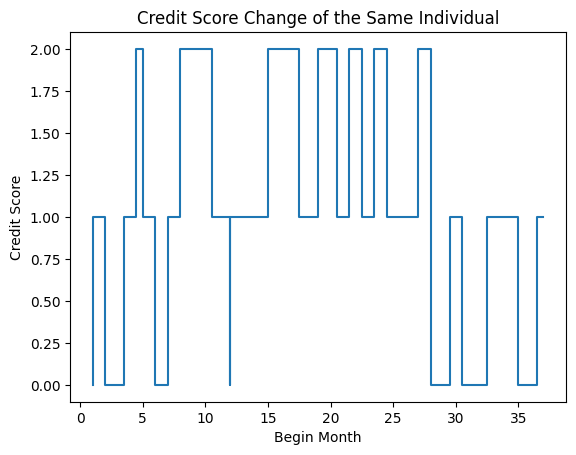

In [ ]:
dup = train_cleaned_unknown[train_cleaned_unknown['id']==duplicated_case_1]
dup = dup.sort_values('begin_month')

plt.step(dup['begin_month'], dup['credit'], where='mid')

plt.xlabel('Begin Month')
plt.ylabel('Credit Score')
plt.title("Credit Score Change of the Same Individual")
plt.show()

3년 동안의 신용도 변화가...

###card_count 피처 생성

In [ ]:
# 동일 id를 가진 사람이 발급 받은 카드 개수 피처 생성

for df in [train_cleaned_unknown, test_cleaned_unknown, train_cleaned_knn, test_cleaned_knn]:
  df['card_count'] = df.groupby('id')['id'].transform('count')

In [ ]:
train_cleaned_knn[['id', 'card_count']].drop_duplicates().sort_values(by='card_count', ascending=False).head(10)

,id,card_count
130,F_N_Y_0_12.601490784782536_Commercial associat...,35
762,F_N_Y_1_11.967187086434018_State servant_Secon...,24
391,M_N_N_2_12.323860125621126_Working_Higher educ...,24
359,F_N_Y_1_11.813037464800539_Working_Secondary /...,20
201,F_Y_Y_0_12.323860125621126_Working_Higher educ...,20
1525,F_N_Y_0_12.323860125621126_Pensioner_Secondary...,20
1104,F_N_Y_0_12.218500103788143_Pensioner_Secondary...,20
3858,F_N_Y_0_11.779136168550774_Working_Secondary /...,19
1378,F_N_Y_1_11.119897691565697_Working_Secondary /...,18
698,F_N_Y_1_11.967187086434018_Working_Secondary /...,18


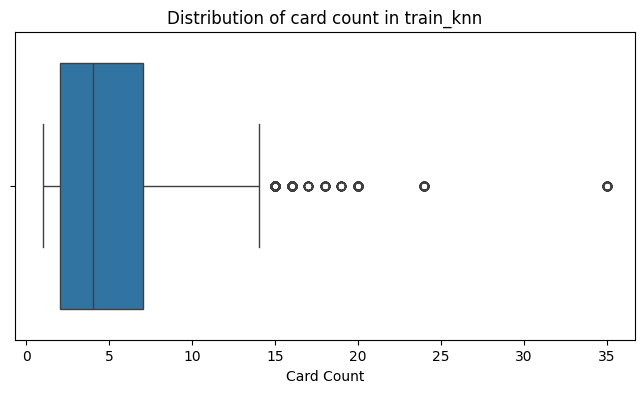

In [ ]:
# train 카드 개수 분포 시각화
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_cleaned_knn['card_count'])

plt.xlabel('Card Count')
plt.title('Distribution of card count in train_knn')
plt.show()

train 데이터의 경우 최대 35개까지 발급 받은 사람 있음

In [ ]:
test_cleaned_knn[['id', 'card_count']].drop_duplicates().sort_values(by='card_count', ascending=False).head(3)

,id,card_count
573,F_N_Y_0_12.601490784782536_Commercial associat...,16
940,F_N_Y_1_11.967187086434018_State servant_Secon...,11
3271,F_N_Y_1_11.119897691565697_Working_Secondary /...,10


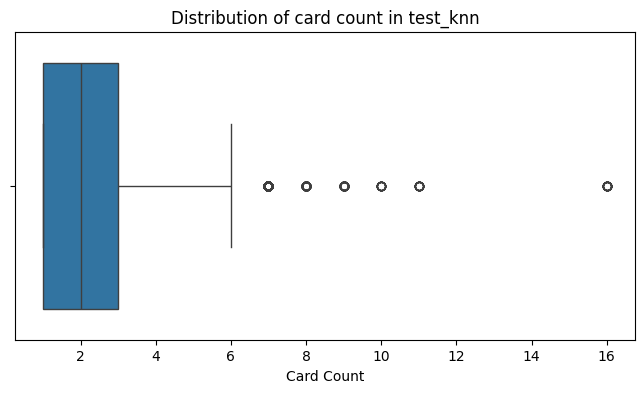

In [ ]:
# test 카드 개수 분포 시각화
plt.figure(figsize=(8, 4))
sns.boxplot(x=test_cleaned_knn['card_count'])

plt.xlabel('Card Count')
plt.title('Distribution of card count in test_knn')
plt.show()

test 데이터의 경우 최대 16개까지 발급 받은 사람 있음

##Step 5. 명목형 변수 처리

Catboost는 필요 없음. RandomForest, LGBM, XGBoost를 위한 명목형 변수 처리

- train_knn_copy
- test_knn_copy
- train_unknown_copy
- test_unknown_copy

In [ ]:
train_knn_copy = train_cleaned_knn.copy()
test_knn_copy = test_cleaned_knn.copy()

train_unknown_copy = train_cleaned_unknown.copy()
test_unknown_copy = test_cleaned_unknown.copy()

In [ ]:
#gender, car, reality 처리

for df in [train_knn_copy, test_knn_copy, train_unknown_copy, test_unknown_copy]:
  df['gender'] = df['gender'].replace({'F': 0, 'M': 1})
  df['car'] = df['car'].replace({'N': 0, 'Y': 1})
  df['reality'] = df['reality'].replace({'N': 0, 'Y': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Nominal Encoding (명목형 변수)
categorical_cols = ['edu_type', 'family_type', 'income_type', 'house_type', 'occyp_type']
label_encoders_knn = {}
label_encoders_unknown = {}

#knn
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_knn_copy[col])  # train 데이터 기준 학습
    train_knn_copy[col] = le.transform(train_knn_copy[col])  # 변환
    test_knn_copy[col] = le.transform(test_knn_copy[col])  # 변환
    label_encoders_knn[col] = le  # 변환 기준 저장 (디코딩 용도)

#unknown
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train_unknown_copy[col])  # train 데이터 기준 학습
    train_unknown_copy[col] = le.transform(train_unknown_copy[col])  # 변환
    test_unknown_copy[col] = le.transform(test_unknown_copy[col])  # 변환
    label_encoders_unknown[col] = le  # 변환 기준 저장 (디코딩 용도)

knn_temp = pd.concat([train_knn_copy['id'], test_knn_copy['id']], axis = 0)
le = LabelEncoder()
le.fit(knn_temp)
train_knn_copy['id'] = le.transform(train_knn_copy['id'])
test_knn_copy['id'] = le.transform(test_knn_copy['id'])

unknown_temp = pd.concat([train_unknown_copy['id'], test_unknown_copy['id']], axis = 0)
le = LabelEncoder()
le.fit(unknown_temp)
train_unknown_copy['id'] = le.transform(train_unknown_copy['id'])
test_unknown_copy['id'] = le.transform(test_unknown_copy['id'])

In [ ]:
train_knn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26457 non-null  int64  
 1   car                26457 non-null  int64  
 2   reality            26457 non-null  int64  
 3   child_num          26457 non-null  int64  
 4   income_total       26457 non-null  float64
 5   income_type        26457 non-null  int64  
 6   edu_type           26457 non-null  int64  
 7   family_type        26457 non-null  int64  
 8   house_type         26457 non-null  int64  
 9   DAYS_BIRTH         26457 non-null  int64  
 10  DAYS_EMPLOYED      26457 non-null  int64  
 11  work_phone         26457 non-null  int64  
 12  phone              26457 non-null  int64  
 13  email              26457 non-null  int64  
 14  occyp_type         26457 non-null  int64  
 15  family_size        26457 non-null  float64
 16  begin_month        264

##Step 6. 클러스터 변수 추가(method: Kmeans)

In [ ]:
#스케일링 (거리 기반 알고리즘이므로...)

from sklearn.preprocessing import MinMaxScaler

#knn
scaler = MinMaxScaler()
scaler.fit(train_knn_copy.drop('credit', axis = 1))
scaled_knn_train = scaler.transform(train_knn_copy.drop('credit', axis = 1))
scaled_knn_test = scaler.transform(test_knn_copy)

#unknown
scaler = MinMaxScaler()
scaler.fit(train_unknown_copy.drop('credit', axis = 1))
scaled_unknown_train = scaler.transform(train_unknown_copy.drop('credit', axis = 1))
scaled_unknown_test = scaler.transform(test_unknown_copy)

In [ ]:
from sklearn.cluster import KMeans

#knn
kmeans = KMeans(n_clusters= 21, random_state = 42)
kmeans.fit(scaled_knn_train)
for df in [train_cleaned_knn, train_knn_copy]:
  df['cluster'] = kmeans.predict(scaled_knn_train)
for df in [test_cleaned_knn, test_knn_copy]:
  df['cluster'] = kmeans.predict(scaled_knn_test)

#unknown
kmeans = KMeans(n_clusters= 21, random_state = 42)
kmeans.fit(scaled_unknown_train)
for df in [train_cleaned_unknown, train_unknown_copy]:
  df['cluster'] = kmeans.predict(scaled_unknown_train)
for df in [test_cleaned_unknown, test_unknown_copy]:
  df['cluster'] = kmeans.predict(scaled_unknown_test)

In [ ]:
train_cleaned_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26457 non-null  object 
 1   car                26457 non-null  object 
 2   reality            26457 non-null  object 
 3   child_num          26457 non-null  int64  
 4   income_total       26457 non-null  float64
 5   income_type        26457 non-null  object 
 6   edu_type           26457 non-null  object 
 7   family_type        26457 non-null  object 
 8   house_type         26457 non-null  object 
 9   DAYS_BIRTH         26457 non-null  int64  
 10  DAYS_EMPLOYED      26457 non-null  int64  
 11  work_phone         26457 non-null  int64  
 12  phone              26457 non-null  int64  
 13  email              26457 non-null  int64  
 14  occyp_type         26457 non-null  object 
 15  family_size        26457 non-null  float64
 16  begin_month        264

In [ ]:
train_unknown_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26457 non-null  int64  
 1   car                26457 non-null  int64  
 2   reality            26457 non-null  int64  
 3   child_num          26457 non-null  int64  
 4   income_total       26457 non-null  float64
 5   income_type        26457 non-null  int64  
 6   edu_type           26457 non-null  int64  
 7   family_type        26457 non-null  int64  
 8   house_type         26457 non-null  int64  
 9   DAYS_BIRTH         26457 non-null  int64  
 10  DAYS_EMPLOYED      26457 non-null  int64  
 11  work_phone         26457 non-null  int64  
 12  phone              26457 non-null  int64  
 13  email              26457 non-null  int64  
 14  occyp_type         26457 non-null  int64  
 15  family_size        26457 non-null  float64
 16  begin_month        264

##Step 7. PCA fucntion

- (family_size, child_num)
- (AGE, DAYS_BIRTH)
- (working_year, DAYS_EMPLOYED)
- (AGE, before_EMPLOYED)

- (ability, DAYS_BIRTH)
- (income_per_family, family_size)
- (ability, AGE)

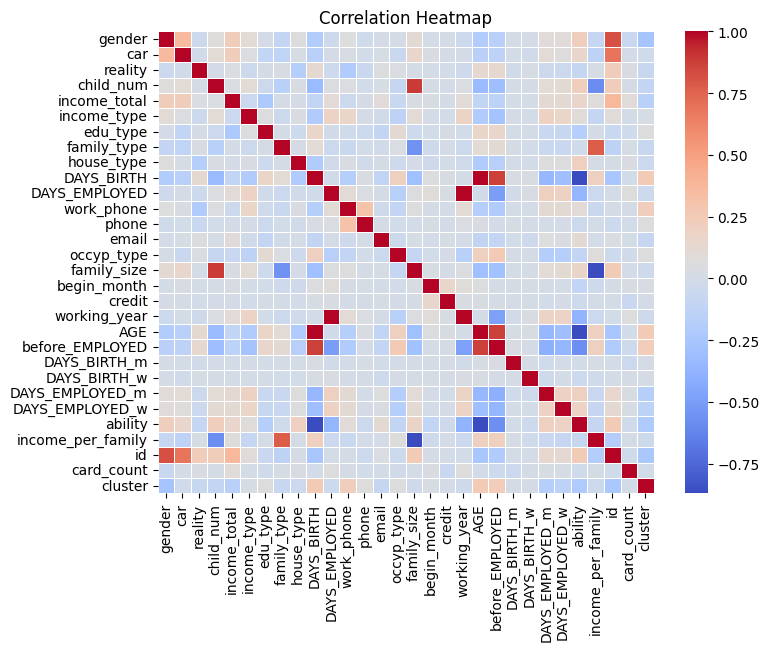

In [ ]:
#변수 간 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(train_unknown_copy.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
high_corr = [('family_size', 'child_num'), ('AGE', 'DAYS_BIRTH'), ('working_year', 'DAYS_EMPLOYED'), ('AGE', 'before_EMPLOYED'), ('ability', 'DAYS_BIRTH'), ('income_per_family', 'family_size'), ('ability', 'AGE'), ('income_per_family', 'family_type')]

for (a, b) in high_corr:
  corr_value = train_unknown_copy[a].corr(train_unknown_copy[b])
  print(f"{a}, {b}: {corr_value:.2f}")

family_size, child_num: 0.89
AGE, DAYS_BIRTH: 1.00
working_year, DAYS_EMPLOYED: 1.00
AGE, before_EMPLOYED: 0.87
ability, DAYS_BIRTH: -0.87
income_per_family, family_size: -0.86
ability, AGE: -0.87
income_per_family, family_type: 0.78


In [ ]:
def pca(df, features, col_name = None): #df는 데이터프레임, features는 리스트
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df[features])

  from sklearn.decomposition import PCA
  pca = PCA(n_components=1)

  # PCA 적용
  pca_result = pca.fit_transform(scaled_data)
  pca_result_df = pd.DataFrame(pca_result, columns=[col_name])

  pca_df = df.drop(columns= features, axis=1, inplace = False)
  pca_result_df.index = pca_df.index
  pca_df = pd.concat([pca_df, pca_result_df], axis = 1)

  return pca_df

In [ ]:
#이렇게 사용하면 됩니다

pca_sample = train_unknown_copy.copy()
pca_sample_result = pca(pca_sample, ['family_size', 'child_num'], col_name = 'family_child_pca')
pca_sample_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26457 non-null  int64  
 1   car                26457 non-null  int64  
 2   reality            26457 non-null  int64  
 3   income_total       26457 non-null  float64
 4   income_type        26457 non-null  int64  
 5   edu_type           26457 non-null  int64  
 6   family_type        26457 non-null  int64  
 7   house_type         26457 non-null  int64  
 8   DAYS_BIRTH         26457 non-null  int64  
 9   DAYS_EMPLOYED      26457 non-null  int64  
 10  work_phone         26457 non-null  int64  
 11  phone              26457 non-null  int64  
 12  email              26457 non-null  int64  
 13  occyp_type         26457 non-null  int64  
 14  begin_month        26457 non-null  float64
 15  credit             26457 non-null  float64
 16  working_year       264

#2. Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

#최종 전처리된 데이터셋들입니다 필요한거 복사해가서 쓰세요

#KNN, 명목형 변수 처리
#   train_knn_copy
#   test_knn_copy

#unknown, 명목형 변수 처리
#   train_unknown_copy
#   test_unknown_copy

#KNN, 명목형 변수 그대로
#   train_cleaned_knn
#   test_cleaned_knn

#unknown, 명목형 변수 그대로
#   train_cleaned_unknown
#   test_cleaned_unknown

##RandomForest (final score: 0.722412892)
Unknown 결과
public: 0.722412892 <br>
private: 0.7127837167

KNN 결과
public: 0.7326543783 <br>
private: 0.7252518711

> 더 좋은 모델: Unknown

Unknown

In [ ]:
train_rf = train_unknown_copy.copy() #필요한 데이터로 골라 넣기 knn or unknown
test_rf = test_unknown_copy.copy()

X_rf = train_rf.drop('credit', axis = 1)
y_rf = train_rf['credit']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [1, 2, 4],
}

rf_gridCV = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf_gridCV.fit(X_train, y_train)
rf_clf_grid = rf_gridCV.best_estimator_
rf_prob_pred = rf_clf_grid.predict_proba(test_rf)

In [ ]:
rf_gridCV.best_params_

{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 200}

In [ ]:
best_params_ = {
    'max_depth':20,
    'min_samples_split':4,
    'n_estimators':200
}

best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=4,
    n_estimators=200
)

best_rf.fit(X_train, y_train)

rf_prob_pred_unknown = best_rf.predict_proba(X_test)
rf_proba_unknown = best_rf.predict_proba(test_rf)

logloss = log_loss(y_test, rf_prob_pred_unknown)

print(logloss)

0.7058593577843325


Knn

In [ ]:
train_rf = train_knn_copy.copy() #필요한 데이터로 골라 넣기 knn or unknown
test_rf = test_knn_copy.copy()

X_rf = train_rf.drop('credit', axis = 1)
y_rf = train_rf['credit']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [1, 2, 4],
}

rf_gridCV = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf_gridCV.fit(X_train, y_train)
rf_clf_grid = rf_gridCV.best_estimator_
rf_prob_pred = rf_clf_grid.predict_proba(test_rf)

In [ ]:
rf_gridCV.best_params_

{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 100}

In [ ]:
best_params_ = {
    'max_depth':20,
    'min_samples_split':4,
    'n_estimators':200
}

best_rf_knn = RandomForestClassifier(
    max_depth=20,
    min_samples_split=4,
    n_estimators=200
)

best_rf_knn.fit(X_train, y_train)

rf_prob_pred_knn = best_rf.predict_proba(X_test)
rf_proba_knn = best_rf.predict_proba(test_rf)

logloss = log_loss(y_test, rf_prob_pred_knn)

print(logloss)

0.711377816696477


###submission

In [ ]:
submission = sample_submission.copy()
submission.iloc[:, 1:] = rf_proba_unknown
submission.to_csv('rf_unknown_submission.csv', index=False)

submission = sample_submission.copy()
submission.iloc[:, 1:] = rf_proba_knn
submission.to_csv('rf_knn_submission.csv', index=False)

##Catboost (final score: 0.6677321736)

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

unknown

In [ ]:
train_cat = train_cleaned_unknown.copy()
test_cat = test_cleaned_unknown.copy()

X_cat = train_cat.drop(['credit', 'AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
y_cat = train_cat['credit']

X_cat = pca(X_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

test_cat = test_cat.drop(['AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
test_cat = pca(test_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 42)

In [ ]:
X_cat.info()

In [ ]:
cat_features = [1, 2, 3, 4, 6, 14]

catboost = CatBoostClassifier(
    cat_features= cat_features,
    loss_function='MultiClass',
    iterations=1000,
    depth=3,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    custom_metric=['AUC'],
    verbose=200,
    early_stopping_rounds=10
    )

catboost.fit(X_train, y_train)

prob_pred = catboost.predict_proba(X_test)

logloss = log_loss(y_test, prob_pred)

print(logloss)

knn

In [ ]:
train_cat = train_cleaned_knn.copy()
test_cat = test_cleaned_knn.copy()

X_cat = train_cat.drop(['credit', 'AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
y_cat = train_cat['credit']

X_cat = pca(X_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 42)

In [ ]:
X_cat.info()

In [ ]:
cat_features = [1, 2, 3, 4, 6, 14]

catboost = CatBoostClassifier(
    cat_features= cat_features,
    loss_function='MultiClass',
    iterations=1000,
    depth=3,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    custom_metric=['AUC'],
    verbose=200,
    early_stopping_rounds=10
    )

catboost.fit(X_train, y_train)

prob_pred = catboost.predict_proba(X_test)

logloss = log_loss(y_test, prob_pred)

print(logloss)

###submission

In [ ]:
catboost.fit(X_cat, y_cat)

final_pred = catboost.predict_proba(test_cat)

0:	learn: 1.0702015	total: 139ms	remaining: 2m 18s
200:	learn: 0.7153669	total: 20.3s	remaining: 1m 20s
400:	learn: 0.7104291	total: 37.2s	remaining: 55.6s
600:	learn: 0.7074956	total: 52.7s	remaining: 35s
800:	learn: 0.7050242	total: 1m 8s	remaining: 17s
999:	learn: 0.7024914	total: 1m 25s	remaining: 0us


In [ ]:
final_pred_df = pd.DataFrame(final_pred, columns=[0, 1, 2])

final_pred_df.head()

,0,1,2
0,0.117896,0.159385,0.722719
1,0.371543,0.194666,0.433791
2,0.033503,0.067099,0.899398
3,0.055928,0.070899,0.873173
4,0.094181,0.195729,0.710091


In [ ]:
sample_submission.iloc[:, 1:4] = final_pred_df

sample_submission.head()

,index,0,1,2
0,26457,0.117896,0.159385,0.722719
1,26458,0.371543,0.194666,0.433791
2,26459,0.033503,0.067099,0.899398
3,26460,0.055928,0.070899,0.873173
4,26461,0.094181,0.195729,0.710091


In [ ]:
sample_submission.to_csv('submission_catboost.csv', index=False)

##XGBoost (final score: 0.7353908575)

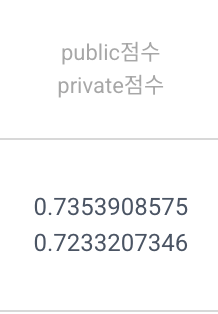

In [ ]:
train_xgb = train_knn_copy.copy()
test_xgb = test_knn_copy.copy()

X_xgb = train_xgb.drop(columns=['credit'])
y_xgb = train_xgb['credit']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state = 42)

In [ ]:
best_params_ = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.8
}

best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss')

best_xgb.fit(X_train, y_train)

xgb_prob_pred = best_xgb.predict_proba(X_test)

logloss = log_loss(y_test, xgb_prob_pred)

print(logloss)

0.7189243567708828


###submission

In [ ]:
test_xgb = test_xgb[X_xgb.columns]

xgb_pred_proba = best_xgb.predict_proba(test_xgb)

submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

submission.iloc[:, 0:3] = xgb_pred_proba

submission.to_csv('xgb_knn_submission.csv', index=True)

In [ ]:
submission

,0,1,2
index,,,
26457,0.035421,0.161834,0.802745
26458,0.109088,0.147422,0.743490
26459,0.062473,0.046758,0.890768
26460,0.108893,0.047162,0.843945
26461,0.035359,0.060959,0.903682
...,...,...,...
36452,0.076161,0.083527,0.840312
36453,0.187867,0.339497,0.472635
36454,0.033381,0.119446,0.847173


##Light GBM (final score: 0.7263368125)

unknown data, pca x, vif 고려 피처 삭제 x, GridSearchCV 활용한 것이 가장 성능이 나음

➕ knn, scaling 진행하지 않은 kmeans 변수 추가한 것이 가장 나았음(0.7179) -> 하지만 올바르지 않은 방법이기 때문에 채택 x

1) unknown으로 `occyp_type` 결측치 채운 경우

In [ ]:
from lightgbm import LGBMClassifier
train_lgbm = train_unknown_copy.copy() # unknown
test_lgbm = test_unknown_copy.copy()

X_lgbm = train_lgbm.drop(['credit'], axis = 1)
#X_lgbm = pca(X_lgbm, ['DAYS_BIRTH', 'DAYS_BIRTH_m','AGE','before_EMPLOYED'], col_name = 'PCA1')
#X_lgbm = train_lgbm.drop(['DAYS_BIRTH', 'DAYS_BIRTH_m','AGE','before_EMPLOYED'], axis = 1)
y_lgbm = train_lgbm['credit']

X_train, X_test, y_train, y_test = train_test_split(X_lgbm, y_lgbm, test_size = 0.2, random_state = 42)

`BayesianOptimization`으로 하이퍼파라미터튜닝을 해보자 -> 성능 최악..

In [ ]:
from bayes_opt import BayesianOptimization

def lgb_eval(num_leaves, n_estimators, learning_rate, feature_fraction ,bagging_fraction,max_bin,min_data_in_leaf):
    model = LGBMClassifier(
        num_leaves=int(num_leaves),
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        feature_fraction = feature_fraction,
        bagging_fraction = bagging_fraction,
        max_bin = int(max_bin),
        min_data_in_leaf = int(min_data_in_leaf),
        objective='multiclass', metric='multi_logloss', num_class=3,
        verbose=-1,
        early_stopping_rounds=20
    )
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='multi_logloss')
    return -model.best_score_['valid_0']['multi_logloss']

bayes_params = {
    'num_leaves': (50, 200),
    'n_estimators': (2000, 10000),
    'learning_rate': (0.01, 0.1),
    'feature_fraction':(0.3,1),
    'bagging_fraction':(0,1),
    'max_bin':(100,300),
    'min_data_in_leaf':(30,100)
}

optimizer = BayesianOptimization(lgb_eval, bayes_params, random_state=42)
optimizer.maximize(n_iter=20, init_points=5)
print(optimizer.max)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | min_da... | n_esti... | num_le... |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.7143   | 0.3745    | 0.9655    | 0.07588   | 219.7     | 40.92     | 3.248e+03 | 58.71     |
| 2         | -0.7187   | 0.8662    | 0.7208    | 0.07373   | 104.1     | 97.89     | 8.66e+03  | 81.85     |
| 3         | -0.7088   | 0.1818    | 0.4284    | 0.03738   | 205.0     | 60.24     | 4.33e+03  | 141.8     |
| 4         | -0.7109   | 0.1395    | 0.5045    | 0.04297   | 191.2     | 84.96     | 3.597e+03 | 127.1     |
| 5         | -0.7036   | 0.5924    | 0.3325    | 0.06468   | 134.1     | 34.55     | 9.591e+03 | 194.8     |
| 6         | -0.7115   | 0.2505    | 0.5598    | 0.0187    | 145.3     | 92.84     | 9.838e+03 | 147.1     |
| 7         | -0.7117   | 0.9956    | 0.3535    | 0.0841    | 188.3     | 92.13     | 3.591e+03 | 132.6     |
| 8       

In [ ]:
lgbm_clf = LGBMClassifier(verbose = -1, bagging_fraction = 0.5924145688620425, feature_fraction = 0.3325152889039984, learning_rate = 0.06467903667112945, max_bin = 134, min_data_in_leaf = 34, n_estimators = 9591, num_leaves = 194)
lgbm_clf.fit(X_lgbm,y_lgbm,eval_metric = 'logloss')
#pred = lgbm_clf.predict(X_test)
y_pred_proba = lgbm_clf.predict_proba(test_lgbm)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

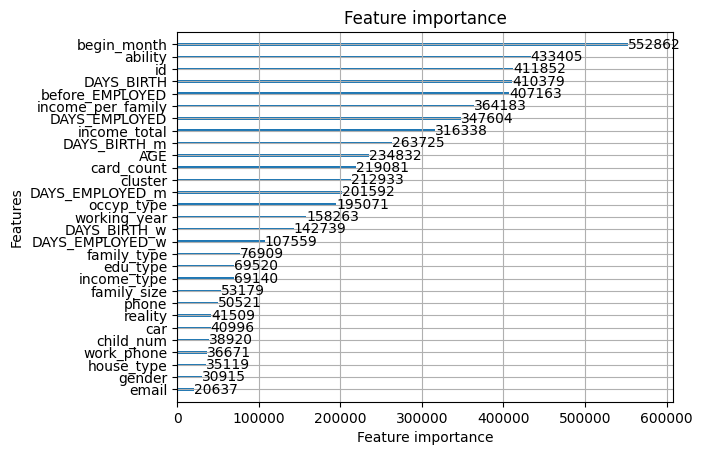

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_clf)

`GridSearchCV`로 하이퍼파라미터튜닝을 해보자

In [ ]:
# Hyperparameter tuning

params = {'num_leaves': [31,70],
          'min_child_samples': [50,70],
          'subsample': [0.8, 0.6],
          'colsample_bytree': [0.8, 0.6]}

lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth =10,verbose = -1,objective='multiclass', num_class=3)

stratified_kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)

grid_lgbm = GridSearchCV(lgbm_clf, param_grid = params, cv = stratified_kfold, n_jobs = 1, scoring = 'neg_log_loss',verbose = 1)
grid_lgbm.fit(X_train,y_train)
print('Best Parameters:', grid_lgbm.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'colsample_bytree': 0.6, 'min_child_samples': 70, 'num_leaves': 31, 'subsample': 0.8}


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth =10,**grid_lgbm.best_params_)
lgbm_clf.fit(X_train, y_train,eval_metric = 'logloss')
#pred = lgbm_clf.predict(X_test)
y_pred_proba = lgbm_clf.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.4f}')

Log Loss: 0.7190


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

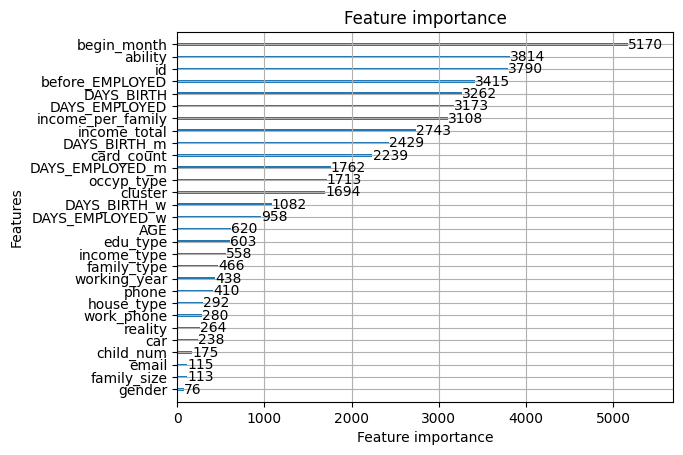

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_clf)

In [ ]:
y_pred_proba_2 = lgbm_clf.predict_proba(test_lgbm)

2) knn으로 결측치 채운 경우

In [ ]:
from lightgbm import LGBMClassifier
train_lgbm = train_knn_copy.copy() #knn
test_lgbm = test_knn_copy.copy()

X_lgbm = train_lgbm.drop(['credit'], axis = 1)
y_lgbm = train_lgbm['credit']

X_train, X_test, y_train, y_test = train_test_split(X_lgbm, y_lgbm, test_size = 0.2, random_state = 42)

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {'num_leaves': [31,70],
          'min_child_samples': [20, 50],
          'subsample': [0.8, 1.0],
          'colsample_bytree': [0.8, 1.0]}

lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth = 20, verbose = -1,objective='multiclass', num_class=3)

stratified_kfold = StratifiedKFold(n_splits = 3, shuffle=True, random_state = 42)

grid_lgbm = GridSearchCV(lgbm_clf, param_grid = params, cv = stratified_kfold, n_jobs = 1, scoring = 'neg_log_loss',verbose = 1)
grid_lgbm.fit(X_train,y_train)
print('Best Parameters:', grid_lgbm.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'colsample_bytree': 0.8, 'min_child_samples': 50, 'num_leaves': 31, 'subsample': 0.8}


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth = 20, **grid_lgbm.best_params_)
lgbm_clf.fit(X_train,y_train, eval_metric = 'logloss')
y_pred_proba = lgbm_clf.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.4f}')

Log Loss: 0.7181


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

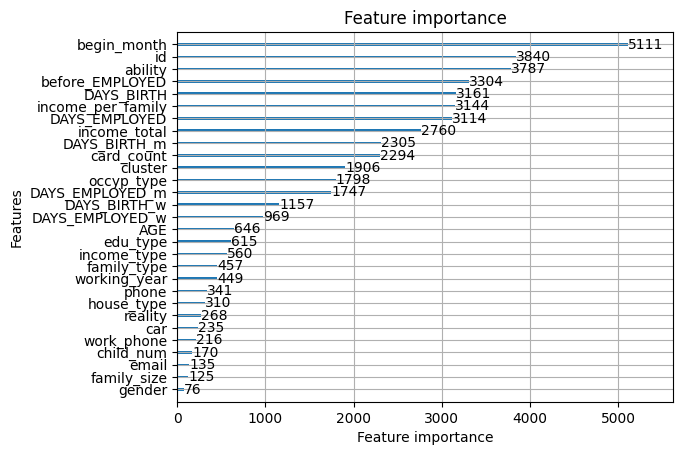

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_clf)

In [ ]:
y_pred_proba_3 = lgbm_clf.predict_proba(test_lgbm)

###submission

* lightgbm1_uk.csv : unknown, bayesian opt
* lightgbm2_uk.csv : unknown, GridSearchCV
* lightgbm3_knn.csv : knn, GridSearchCV

lgbm1

In [ ]:
sample_submission1 = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

In [ ]:
sample_submission1[sample_submission1.columns] = y_pred_proba
sample_submission1

,0,1,2
index,,,
26457,1.388392e-03,1.786295e-03,0.996825
26458,5.038064e-03,4.831372e-02,0.946648
26459,1.615189e-08,1.059928e-06,0.999999
26460,2.702011e-05,3.090252e-05,0.999942
26461,1.277716e-07,6.509782e-07,0.999999
...,...,...,...
36452,8.971858e-06,6.948321e-07,0.999990
36453,1.745745e-03,9.413517e-01,0.056903
36454,1.348013e-06,1.097184e-01,0.890280


In [ ]:
sample_submission1.to_csv('lightgbm1_uk.csv', index=True)

lgbm2 : public 0.7415695899 / private 0.7263368125

In [ ]:
sample_submission2 = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

In [ ]:
sample_submission2[sample_submission2.columns] = y_pred_proba_2
sample_submission2

,0,1,2
index,,,
26457,0.068948,0.171873,0.759179
26458,0.122457,0.155643,0.721900
26459,0.067916,0.084249,0.847835
26460,0.107127,0.037746,0.855127
26461,0.039886,0.049716,0.910397
...,...,...,...
36452,0.038121,0.100201,0.861679
36453,0.267875,0.258633,0.473492
36454,0.026293,0.112628,0.861079


In [ ]:
sample_submission2.to_csv('lightgbm2_uk.csv', index=True)

lgbm3 public 0.7438981588 / private 0.7350412994

In [ ]:
sample_submission3 = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 1/데이터/sample_submission.csv',index_col = 'index')

In [ ]:
sample_submission3[sample_submission3.columns] = y_pred_proba_3
sample_submission3

,0,1,2
index,,,
26457,0.033464,0.149040,0.817496
26458,0.058252,0.174154,0.767594
26459,0.077154,0.094085,0.828761
26460,0.090270,0.049555,0.860175
26461,0.107499,0.084172,0.808328
...,...,...,...
36452,0.060462,0.093751,0.845787
36453,0.236189,0.344225,0.419586
36454,0.033858,0.204268,0.761874


In [ ]:
sample_submission3.to_csv('lightgbm3_knn.csv', index=True)

#Ensemble

##Voting (final score: 0.6895827807)

*private: 0.6813301288

In [ ]:
#from rf
train_rf = train_unknown_copy.copy()
test_rf = test_unknown_copy.copy()

X_rf = train_rf.drop('credit', axis = 1)
y_rf = train_rf['credit']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)

best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=4,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train, y_train)
probs_rf = best_rf.predict_proba(X_test)

#from cat
train_cat = train_cleaned_unknown.copy()
test_cat = test_cleaned_unknown.copy()

X_cat = train_cat.drop(['credit', 'AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
y_cat = train_cat['credit']

X_cat = pca(X_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 42)

cat_features = [1, 2, 3, 4, 6, 14]

catboost = CatBoostClassifier(
    cat_features= cat_features,
    loss_function='MultiClass',
    iterations=1000,
    depth=3,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    custom_metric=['AUC'],
    verbose=500,
    early_stopping_rounds=10,
    random_state=42
    )

catboost.fit(X_train, y_train)

probs_cat = catboost.predict_proba(X_test)

#from xgb
train_xgb = train_knn_copy.copy()
test_xgb = test_knn_copy.copy()

X_xgb = train_xgb.drop(columns=['credit'])
y_xgb = train_xgb['credit']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state = 42)

best_params_ = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.8,
}

best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)

best_xgb.fit(X_train, y_train)

probs_xgb = best_xgb.predict_proba(X_test)

#from lgbm
train_lgbm = train_unknown_copy.copy() # unknown
test_lgbm = test_unknown_copy.copy()

X_lgbm = train_lgbm.drop(['credit'], axis = 1)
y_lgbm = train_lgbm['credit']

X_train, X_test, y_train, y_test = train_test_split(X_lgbm, y_lgbm, test_size = 0.2, random_state = 42)

best_params__ = {'colsample_bytree': 0.6, 'min_child_samples': 70, 'num_leaves': 31, 'subsample': 0.8}

lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth =10,**best_params__, random_state=42)
lgbm_clf.fit(X_train, y_train,eval_metric = 'logloss')

probs_lgbm = lgbm_clf.predict_proba(X_test)

print('probs_rf.shape: ', probs_rf.shape)
print('probs_cat.shape: ', probs_cat.shape)
print('probs_xgb.shape: ', probs_xgb.shape)
print('probs_lgbm.shape: ', probs_lgbm.shape)

0:	learn: 1.0701003	total: 65.7ms	remaining: 1m 5s
500:	learn: 0.7172819	total: 21.7s	remaining: 21.7s
999:	learn: 0.7090128	total: 47.4s	remaining: 0us
probs_rf.shape:  (5292, 3)
probs_cat.shape:  (5292, 3)
probs_xgb.shape:  (5292, 3)
probs_lgbm.shape:  (5292, 3)


In [ ]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import log_loss

# 실제 정답 (y_test)
y_true = y_test

# Log Loss 최적화를 위한 가중치 조합 함수
def log_loss_weighted(weights):
    weights = np.array(weights)
    ensemble_probs = (weights[0] * probs_rf +
                      weights[1] * probs_cat +
                      weights[2] * probs_xgb +
                      weights[3] * probs_lgbm)
    return log_loss(y_true, ensemble_probs)

# 초기 가중치 설정 (균등 가중치)
init_weights = [0.25, 0.25, 0.25, 0.25]

# 가중치의 합이 1이 되도록 제약 조건 설정
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# 가중치는 0~1 사이로 설정
bounds = [(0, 1)] * 4

# 최적화 수행
result = minimize(log_loss_weighted, init_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# 최적 가중치 출력
optimal_weights = result.x
print("Optimal Weights:", optimal_weights)

# 최적 가중치 적용한 앙상블 결과
final_ensemble_probs = (optimal_weights[0] * probs_rf +
                         optimal_weights[1] * probs_cat +
                         optimal_weights[2] * probs_xgb +
                         optimal_weights[3] * probs_lgbm)

# 최적화된 앙상블 모델의 Log Loss
final_log_loss = log_loss(y_true, final_ensemble_probs)
print("Final Ensemble Log Loss:", final_log_loss)

Optimal Weights: [0.07505269 0.67536722 0.24958009 0.        ]
Final Ensemble Log Loss: 0.6830904105682439


###submission

In [ ]:
# test_rf 전처리
test_rf = test_unknown_copy.copy()

# test_cat 전처리
test_cat = test_cleaned_unknown.copy()
test_cat = test_cat.drop(['AGE', 'email', 'car', 'working_year', 'reality', 'gender',
                          'child_num', 'work_phone', 'family_size', 'phone'], axis=1)
test_cat = pca(test_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name='PCA1')

# test_xgb 전처리
test_xgb = test_knn_copy.copy()

# test_lgbm 전처리
test_lgbm = test_unknown_copy.copy()

# 예측 수행
probs_rf_test = best_rf.predict_proba(test_rf)
probs_cat_test = catboost.predict_proba(test_cat)
probs_xgb_test = best_xgb.predict_proba(test_xgb)
probs_lgbm_test = lgbm_clf.predict_proba(test_lgbm)

print('probs_rf_test.shape: ', probs_rf_test.shape)
print('probs_cat_test.shape: ', probs_cat_test.shape)
print('probs_xgb_test.shape: ', probs_xgb_test.shape)
print('probs_lgbm_test.shape: ', probs_lgbm_test.shape)

probs_rf_test.shape:  (10000, 3)
probs_cat_test.shape:  (10000, 3)
probs_xgb_test.shape:  (10000, 3)
probs_lgbm_test.shape:  (10000, 3)


In [ ]:
# Test 데이터에 대한 확률 예측
probs_rf_test = best_rf.predict_proba(test_rf)
probs_cat_test = catboost.predict_proba(test_cat)
probs_xgb_test = best_xgb.predict_proba(test_xgb)
probs_lgbm_test = lgbm_clf.predict_proba(test_lgbm)

# 초기 가중치 설정 (균등 가중치)
init_weights = [0.25, 0.25, 0.25, 0.25]

# 가중치의 합이 1이 되도록 제약 조건 설정
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# 가중치는 0~1 사이로 설정
bounds = [(0, 1)] * 4

# 최적화 수행
result = minimize(log_loss_weighted, init_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# 최적 가중치 출력
optimal_weights = result.x
print("Optimal Weights:", optimal_weights)

# 최적 가중치를 적용한 앙상블 확률
final_ensemble_probs_test = (optimal_weights[0] * probs_rf_test +
                             optimal_weights[1] * probs_cat_test +
                             optimal_weights[2] * probs_xgb_test +
                             optimal_weights[3] * probs_lgbm_test)

Optimal Weights: [0.07505269 0.67536722 0.24958009 0.        ]


In [ ]:
# 기존 sample_submission 파일 로드 (index 유지)
sample_submission_e = pd.read_csv('sample_submission.csv', index_col='index')

# 예측된 앙상블 확률을 sample_submission의 값으로 설정
sample_submission_e[sample_submission_e.columns] = final_ensemble_probs_test

# 최종 제출 파일 저장
sample_submission_e.to_csv('ensemble_submission.csv', index=True)

In [ ]:
ensemble_submission = pd.read_csv('ensemble_submission.csv',index_col = 'index')

In [ ]:
ensemble_submission

,0,1,2
index,,,
26457,0.082623,0.156747,0.760630
26458,0.100369,0.108841,0.790790
26459,0.057009,0.090641,0.852349
26460,0.061571,0.056888,0.881540
26461,0.078687,0.147964,0.773349
...,...,...,...
36452,0.061321,0.101499,0.837181
36453,0.333749,0.222544,0.443707
36454,0.052391,0.124834,0.822775


##Stacking (final score: 0.7029168757)

*private: 0.6685284362

###데이터 생성

In [ ]:
meta_y = pd.DataFrame(np.zeros((26457, 3)), columns=['y0', 'y1', 'y2'])

for i in range(3):
    meta_y.loc[train_cleaned['credit'] == i, f'y{i}'] = 1

meta_y.sample(10)

,y0,y1,y2
13418,0.0,0.0,1.0
21921,1.0,0.0,0.0
19039,0.0,0.0,1.0
698,0.0,1.0,0.0
15317,0.0,0.0,1.0
17003,1.0,0.0,0.0
21466,1.0,0.0,0.0
23163,0.0,0.0,1.0
15600,0.0,0.0,1.0
10758,0.0,0.0,1.0


In [ ]:
train_rf = train_unknown_copy.copy()
test_rf = test_unknown_copy.copy()

X_rf = train_rf.drop('credit', axis = 1)
y_rf = train_rf['credit']

train_cat = train_cleaned_unknown.copy()
test_cat = test_cleaned_unknown.copy()

X_cat = train_cat.drop(['credit', 'AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
y_cat = train_cat['credit']

X_cat = pca(X_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

train_xgb = train_knn_copy.copy()
test_xgb = test_knn_copy.copy()

X_xgb = train_xgb.drop(columns=['credit'])
y_xgb = train_xgb['credit']

train_lgbm = train_unknown_copy.copy() # unknown
test_lgbm = test_unknown_copy.copy()

X_lgbm = train_lgbm.drop(['credit'], axis = 1)
y_lgbm = train_lgbm['credit']

X_train_rf, X_test_rf, X_train_cat, X_test_cat, X_train_xgb, X_test_xgb, X_train_lgbm, X_test_lgbm, y_train, y_test, meta_y_, meta_y = train_test_split(X_rf, X_cat, X_xgb, X_lgbm, y_lgbm, meta_y, test_size = 0.2, random_state = 42)

print(X_train_rf.shape, X_test_rf.shape, X_train_cat.shape, X_test_cat.shape, X_train_xgb.shape, X_test_xgb.shape, X_train_lgbm.shape, X_test_lgbm.shape, y_train.shape, y_test.shape, meta_y_.shape, meta_y.shape)

(21165, 29) (5292, 29) (21165, 18) (5292, 18) (21165, 29) (5292, 29) (21165, 29) (5292, 29) (21165,) (5292,) (21165, 3) (5292, 3)


In [ ]:
#from rf
best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=4,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train_rf, y_train)
probs_rf = best_rf.predict_proba(X_test_rf)

#from cat
cat_features = [1, 2, 3, 4, 6, 14]

catboost = CatBoostClassifier(
    cat_features= cat_features,
    loss_function='MultiClass',
    iterations=1000,
    depth=3,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    custom_metric=['AUC'],
    verbose=500,
    early_stopping_rounds=10,
    random_state=42
    )

catboost.fit(X_train_cat, y_train)

probs_cat = catboost.predict_proba(X_test_cat)

#from xgb
best_params_ = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.8,
}

best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)

best_xgb.fit(X_train_xgb, y_train)

probs_xgb = best_xgb.predict_proba(X_test_xgb)

#from lgbm
best_params__ = {'colsample_bytree': 0.6, 'min_child_samples': 70, 'num_leaves': 31, 'subsample': 0.8}

lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth =10,**best_params__, random_state=42)
lgbm_clf.fit(X_train_lgbm, y_train,eval_metric = 'logloss')

probs_lgbm = lgbm_clf.predict_proba(X_test_lgbm)

print('probs_rf.shape: ', probs_rf.shape)
print('probs_cat.shape: ', probs_cat.shape)
print('probs_xgb.shape: ', probs_xgb.shape)
print('probs_lgbm.shape: ', probs_lgbm.shape)

0:	learn: 1.0701003	total: 99.4ms	remaining: 1m 39s
500:	learn: 0.7172819	total: 50.7s	remaining: 50.5s
999:	learn: 0.7090128	total: 1m 52s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1981
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 29
[LightGBM] [Info] Start training from score -2.107665
[LightGBM] [Info] Start training from score -1.441911
[LightGBM] [Info] Start training from score -0.443162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [ ]:
meta_X = pd.DataFrame(np.column_stack([probs_rf, probs_cat, probs_xgb, probs_lgbm]), columns=['rf0', 'rf1', 'rf2', 'cat0', 'cat1', 'cat2', 'xgb0', 'xgb1', 'xgb2', 'lgbm0', 'lgbm1', 'lgbm2'])

meta_X.head(3)

,rf0,rf1,rf2,cat0,cat1,cat2,xgb0,xgb1,xgb2,lgbm0,lgbm1,lgbm2
0,0.050202,0.448642,0.501156,0.076964,0.251455,0.671581,0.031790,0.483117,0.485093,0.038153,0.463420,0.498427
1,0.040955,0.537062,0.421984,0.081364,0.305765,0.612870,0.025823,0.593119,0.381058,0.013048,0.467266,0.519686
2,0.071590,0.128517,0.799893,0.063945,0.112863,0.823193,0.022480,0.119303,0.858217,0.013989,0.087659,0.898352


###메타모델 피팅

In [ ]:
meta_X_train, meta_X_test, meta_y_train, meta_y_test = train_test_split(meta_X, meta_y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(meta_X_train, meta_y_train)

lm_pred = lm.predict(meta_X_test)
log_loss(meta_y_test, lm_pred)

0.7510753542290868

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(meta_X_train, meta_y_train)

rf_reg_pred = rf_reg.predict(meta_X_test)
log_loss(meta_y_test, rf_reg_pred)

0.7640331152444407

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 객체 생성
meta_xgb = XGBRegressor(eval_metric='logloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [1, 3, 5],           # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05, 0.1], # 학습률
    'subsample': [0.8, 1.0],           # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]     # 트리별 특성 샘플링 비율
}

# GridSearchCV 실행 (교차 검증 5-Fold 사용)
grid_search = GridSearchCV(
    estimator=meta_xgb,
    param_grid=param_grid,
    scoring='neg_log_loss',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(meta_X_train, meta_y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 1, 'subsample': 0.8}


In [ ]:
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 1, 'subsample': 0.8}

xgb_reg = XGBRegressor(**best_params, random_state=42)
xgb_reg.fit(meta_X_train, meta_y_train)

xgb_reg_pred = xgb_reg.predict(meta_X_test)
log_loss(meta_y_test, xgb_reg_pred)

0.785313239766614

###submission

In [ ]:
train_rf = train_unknown_copy.copy()
test_rf = test_unknown_copy.copy()

X_rf = train_rf.drop('credit', axis = 1)
y_rf = train_rf['credit']

train_cat = train_cleaned_unknown.copy()
test_cat = test_cleaned_unknown.copy()

X_cat = train_cat.drop(['credit', 'AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
y_cat = train_cat['credit']

X_cat = pca(X_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

test_cat = test_cat.drop(['AGE', 'email', 'car', 'working_year', 'reality', 'gender', 'child_num', 'work_phone', 'family_size', 'phone'], axis = 1, inplace = False)
test_cat = pca(test_cat, ['DAYS_BIRTH', 'before_EMPLOYED'], col_name = 'PCA1')

train_xgb = train_knn_copy.copy()
test_xgb = test_knn_copy.copy()

X_xgb = train_xgb.drop(columns=['credit'])
y_xgb = train_xgb['credit']

train_lgbm = train_unknown_copy.copy() # unknown
test_lgbm = test_unknown_copy.copy()

X_lgbm = train_lgbm.drop(['credit'], axis = 1)
y_lgbm = train_lgbm['credit']

In [ ]:
#from rf
best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=4,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_rf, y_rf)
probs_rf = best_rf.predict_proba(test_rf)

#from cat
cat_features = [1, 2, 3, 4, 6, 14]

catboost = CatBoostClassifier(
    cat_features= cat_features,
    loss_function='MultiClass',
    iterations=1000,
    depth=3,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    custom_metric=['AUC'],
    verbose=500,
    early_stopping_rounds=10,
    random_state=42
    )

catboost.fit(X_cat, y_cat)

probs_cat = catboost.predict_proba(test_cat)

#from xgb
best_params_ = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.8,
}

best_xgb = xgb.XGBClassifier(**best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)

best_xgb.fit(X_xgb, y_xgb)

probs_xgb = best_xgb.predict_proba(test_xgb)

#from lgbm
best_params__ = {'colsample_bytree': 0.6, 'min_child_samples': 70, 'num_leaves': 31, 'subsample': 0.8}

lgbm_clf = LGBMClassifier(n_estimators = 500, max_depth =10,**best_params__, random_state=42)
lgbm_clf.fit(X_lgbm, y_lgbm,eval_metric = 'logloss')

probs_lgbm = lgbm_clf.predict_proba(test_lgbm)

print('probs_rf.shape: ', probs_rf.shape)
print('probs_cat.shape: ', probs_cat.shape)
print('probs_xgb.shape: ', probs_xgb.shape)
print('probs_lgbm.shape: ', probs_lgbm.shape)

0:	learn: 1.0698580	total: 242ms	remaining: 4m 1s
500:	learn: 0.7083785	total: 1m 1s	remaining: 1m 1s
999:	learn: 0.7019800	total: 2m 8s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26457, number of used features: 29
[LightGBM] [Info] Start training from score -2.105518
[LightGBM] [Info] Start training from score -1.440223
[LightGBM] [Info] Start training from score -0.444192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [ ]:
meta_X = pd.DataFrame(np.column_stack([probs_rf, probs_cat, probs_xgb, probs_lgbm]), columns=['rf0', 'rf1', 'rf2', 'cat0', 'cat1', 'cat2', 'xgb0', 'xgb1', 'xgb2', 'lgbm0', 'lgbm1', 'lgbm2'])

lm_pred = lm.predict(meta_X)

lm_pred_df = pd.DataFrame(lm_pred, columns=[0, 1, 2])

sample_submission.iloc[:, 1:4] = lm_pred_df
sample_submission

,index,0,1,2
0,26457,0.083907,0.146169,0.769924
1,26458,0.361864,0.171466,0.466670
2,26459,0.046238,0.065283,0.888479
3,26460,0.064528,0.058284,0.877189
4,26461,0.069629,0.190979,0.739392
...,...,...,...,...
9995,36452,0.081628,0.209105,0.709267
9996,36453,0.334339,0.168210,0.497450
9997,36454,0.040983,0.128317,0.830700
9998,36455,0.173831,0.265311,0.560858


In [ ]:
sample_submission.to_csv('submission_stacking_lm.csv', index=False)